# Brain Tumor Image Segmentation with U-Net

## 1. Environment Setup

Required dependencies:

* **Python 3.7+**
* **PyTorch**
* **NumPy** 
* **SciPy**
* **scikit-image**
* **Matplotlib**, 
* **graphviz**
* **torchviz** 
* **tqdm** 
* **nibabel** 

## 2. Dataset Preparation

### 2.1 MSD Dataset Introduction

The **Medical Segmentation Decathlon** is a dataset designed for **medical image segmentation** task, which is helpful for applications like disease diagnosis and treatment planning. It comprises 10 different segmentation tasks, including Brain Tumor Segmentation, Heart Segmentation, Liver Tumor Segmentation, and so on. This project mainly focuses on the **BraTS** dataset for Brain Tumor Segmentation. Here's a brief introduction on the Brain Tumor Dataset:

* **Imaging Modalities**:

    Multi-modal MRI scans, commonly including T1-weighted, T1-weighted contrast-enhanced, T2-weighted, and FLAIR (Fluid Attenuated Inversion Recovery) images. Each modality provides unique contrast characteristics that help distinguish tumor tissues from healthy tissues.

    1. **T1-weigted (T1)**:
        * **Function**: Provides high-resolution anatomical(解刨的) detail.
        * **Characteristics**: In T1-weighted images, fat appears bright, while water or fluid signals, like Cerebrospinal fluid (CSF/脑脊液), are darker. It clearly shows anatomical structures, such as the boundaries between gray matter and white matter.
        * **Uses**: Used to evaluate brain anatomy or as a pre-contrast reference before contrast enhancement (对比增强).
        
    2. **T1-Weighted with Contrast Enhancement (T1Gd)**
        *  **Function**: Acquired after the injection of a contrast agent to highlight areas where the blood-brain barrier (BBB/血脑屏障) is disrupted.
        * **Characteristics**：Active tumor areas or lesions (病变) with a damaged blood-brain barrier absorb the contrast agent and show up as bright areas on the image.
        * **Uses**: Particularly useful for identifying tumors, inflammation (炎症), or other pathological (病理的) areas. For brain tumors, it can pinpoint the active parts of the lesion.
    
    3. **T2-weigted (T2)**:
        * **Function**: Sensitive to changes in water content within tissues. 
        * **Characteristics**: In T2-weighted images, water or fluid appears very bright, while fat is darker. This sequence is excellent for visualizing brain edema (脑水肿), tumor infiltration (肿瘤浸润), cysts (囊肿), or late-stage liquefied hemorrhages (晚期液化性出血).
        * **Uses**: Primarily used to detect lesions with high water content, such as brain edema (脑水肿) or abnormalities surrounding tumors.
        
    4. **Fluid-Attenuated Inversion Recovery （FLAIR)**:
        * **Function**: Ehances the visibility of lesions near the ventricles (脑室) or brain surface by suppressing signals from cerebrospinal fluid (CSF/脑脊液). 
        * **Characteristics**: CSF signals are suppressed (darkened), while lesions or abnormalities near CSF spaces stand out more clearly. 
        * **Uses**: Ideal for identifying periventricular (脑室周围的) lesions, chronic infarcts (慢性梗死), inflammation, or other abnormalities.

* **Data Format**:

  The images are stored in NIfTI (`.nii`) format, a standard in medical imaging for handling 3D data.
  
  1. **What is NIfTI?**
      *  **NIfTI** (Neuroimaging Informatics Technology Initiative) is a popular file format (usually `.nii` or `.nii.gz`) for storing medical imaging data.  
          * `.nii`: A single file containing both the header and image data. 
          * `.hdr` and `.img`: The header information is in .hdr and the image data is in .img.
          * `nii.gz`: Compressed version of `.nii` files.  
         
  2. **Structure**:
      * **Header**: Contains metadata describing the image dimensions, voxel sizes, data types, and spatial orientation. Here're some key components:
          * **Image Dimensions**:
              * `dim`: Specifies the number of dimensions and the size of each dimension 
              * Example: `dim = [3, 256, 256, 150]` means a 3D image with 256x256x150 voxels. 
          * **Voxel (体素)**
              * `pixdim`: Specifies the physical size of each voxel in millimeters or seconds (for time).
              * Example: `pixdim = [1, 1.0, 1.0, 1.5]` means voxel dimensions of 1.0mm × 1.0mm × 1.5mm.
          * **Data type**:
              * Specifies the type of data stored in the image (e.g., integer, floating-point). 
              * Example: `datatype = 16` indicates 32-bit floating-point numbers.
          * **Orientation and Spatial Information**
              * `qform_code` and `sform_code`: Define the coordinate space and transformation used for spatial orientation. 
              * `qoffset_x`, `qoffset_y`, `qoffset_z`: Define the origin point of the image in the coordinate system.
              * `Affine Matrix`: Encodes the transformation matrix for mapping image voxels to real-world space.
          * **Intensity Information**
              * `cal_min` and `cal_max`: Specify the scaling range for voxel intensity values.
          * **...** 
          
          
          
      * **Image Data**: Stores the actual imaging data as a multidimensional array (e.g., 3D volumes or 4D sequences for time series).

     

* **Annotations and Labels**:

    Accurate segmentation involves delineating various sub-regions of the brain tumor, each with clinical significance:
        
    1. **Whole Tumor (WT)**: All tumor components, including the enhancing tumor, peritumoral edema, and necrotic or non-enhancing tumor core.
    2. **Tumor Core (TC)**: Consists of the enhancing tumor and the necrotic (坏死的) or non-enhancing tumor core.
    3. **Enhancing Tumor (ET)**: Active tumor areas that become brighter on scans after Gadolinium is given, showing that the blood-brain barrier is damaged.

### 2.2 Dataset Download

* **Option 1: Download from the Website**
   - Download from [http://medicaldecathlon.com](http://medicaldecathlon.com). Under the `Data` section, select `Direct from AWS`, and choose `Task01_BrainTumour`.

* **Option 2: Download through CLI**
    * Turn the following cell from `Markdown` to `code` to download the dataset.

import os

if not os.path.exists('Task01_BrainTumour.tar'):
    print("Dataset not found locally, downloading now...")
    !wget -q https://msd-for-monai.s3-us-west-2.amazonaws.com/Task01_BrainTumour.tar -O Task01_BrainTumour.tar # silently downloads a .tar archive containing the Brain Tumour dataset.
    print("Download complete!")
else:
    print("Dataset archive already exists, skipping download.")

### 2.3 Unzip the file

* Turn the following cell from `Markdown` to `code` to unzip the file.

if not os.path.exists('Task01_BrainTumour'):
    print("Extracting the dataset...")
    !tar -xf Task01_BrainTumour.tar # decompresses and unpacks the .tar file into the current directory.
    print("Extraction complete!")
else:
    print("Dataset folder already exists, skipping extraction.")

print("Verifying the contents of the Task01_BrainTumour directory:")
!ls Task01_BrainTumour

### 2.4 Clearn up the tar files

* Turn the following cell from `Markdown` to `code` to clear up the tar file.

!rm Task01_BrainTumour.tar
print("Cleaned up the tar file after extraction!")

### 2.5 File structure:

* `imagesTr` and `labelsTr` for training.
* `imagesTs` and `labelsTs` for testing.
*  Each subject can have a `.nii.gz` file for different MRI modalities, plus one segmentation mask.

* Turn the following cell from `Markdown` to `code` to see the file structure.

!tree Task01_BrainTumour -L 2

## 3. Dataset Exploration

### 3.1 Explore Different MRI Modalities

In [1]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
image_dir = 'Task01_BrainTumour/imagesTr'
label_dir = 'Task01_BrainTumour/labelsTr'

image_paths = sorted(glob.glob(os.path.join(image_dir, '*.nii.gz')))
label_paths = sorted(glob.glob(os.path.join(label_dir, '*.nii.gz')))

In [3]:
def load_nifti(path: str) -> np.ndarray:
    """
    Loads a NIfTI (.nii, .nii.gz) file from the given path and returns a NumPy array.
    """
    nifti_obj = nib.load(path)
    return nifti_obj.get_fdata()

In [4]:
def display_image_label(image_paths, label_paths, num_examples, channel_idx):    
    fig, axes = plt.subplots(num_examples, 3, figsize=(18, 12))
    
    if num_examples == 1:
        axes = [axes]
    
    print(f"Visualization for the channel {channel_idx+1}:")
    
    for i in range(num_examples):
        image_path = image_paths[1]
        label_path = label_paths[1]
        
        image = load_nifti(image_path) # Shape: (H, W, D) or (H, W, D, C) if multiple channels. D：Slices
        label = load_nifti(label_path) # shape: (H, W, D)

        if image.ndim == 4:
            slice_idx = image.shape[2] // 2  # Pick a middle slice
            img_slice = image[:, :, slice_idx, channel_idx]
            lbl_slice = label[:, :, slice_idx]
            
        else:
            # If there's only one channel, the shape might be (H, W, D)
            slice_idx = image.shape[2] // 2
            img_slice = image[:, :, slice_idx]
            lbl_slice = label[:, :, slice_idx]
        
        # Display the image slice
        axes[i][0].imshow(img_slice, cmap='gray')
        axes[i][0].set_title(f'Example {i+1}: Image Slice')
        axes[i][0].axis('off')

        # Display the label slice
        axes[i][1].imshow(lbl_slice, cmap='gray')
        axes[i][1].set_title('Label Slice')
        axes[i][1].axis('off')

        # Display an overlay of label on the image
        axes[i][2].imshow(img_slice, cmap='gray')
        axes[i][2].imshow(lbl_slice, cmap='jet', alpha=0.5)
        axes[i][2].set_title('Image + Label Overlay')
        axes[i][2].axis('off')
        
    plt.tight_layout()
    plt.show()

Visualize the 1st channel: 

Visualization for the channel 1:


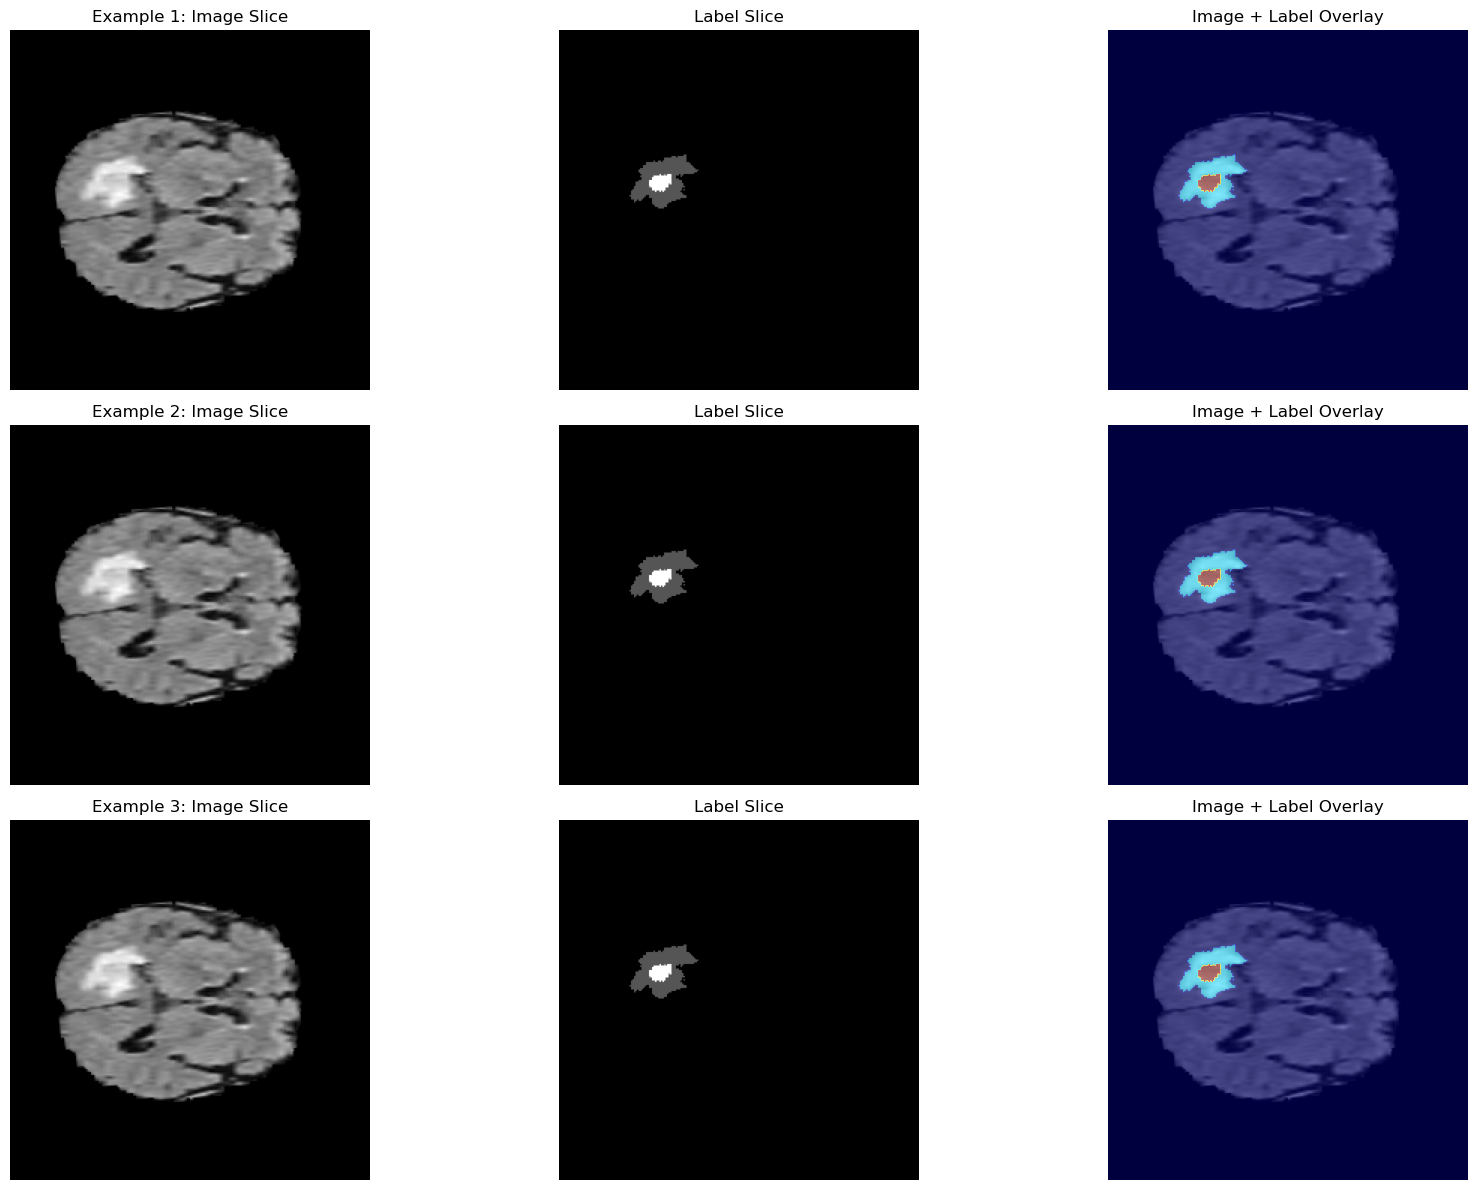

In [5]:
num_examples = 3
channel_idx = 0

display_image_label(image_paths, label_paths, num_examples, channel_idx)

Visualize the 2nd channel: 

Visualization for the channel 2:


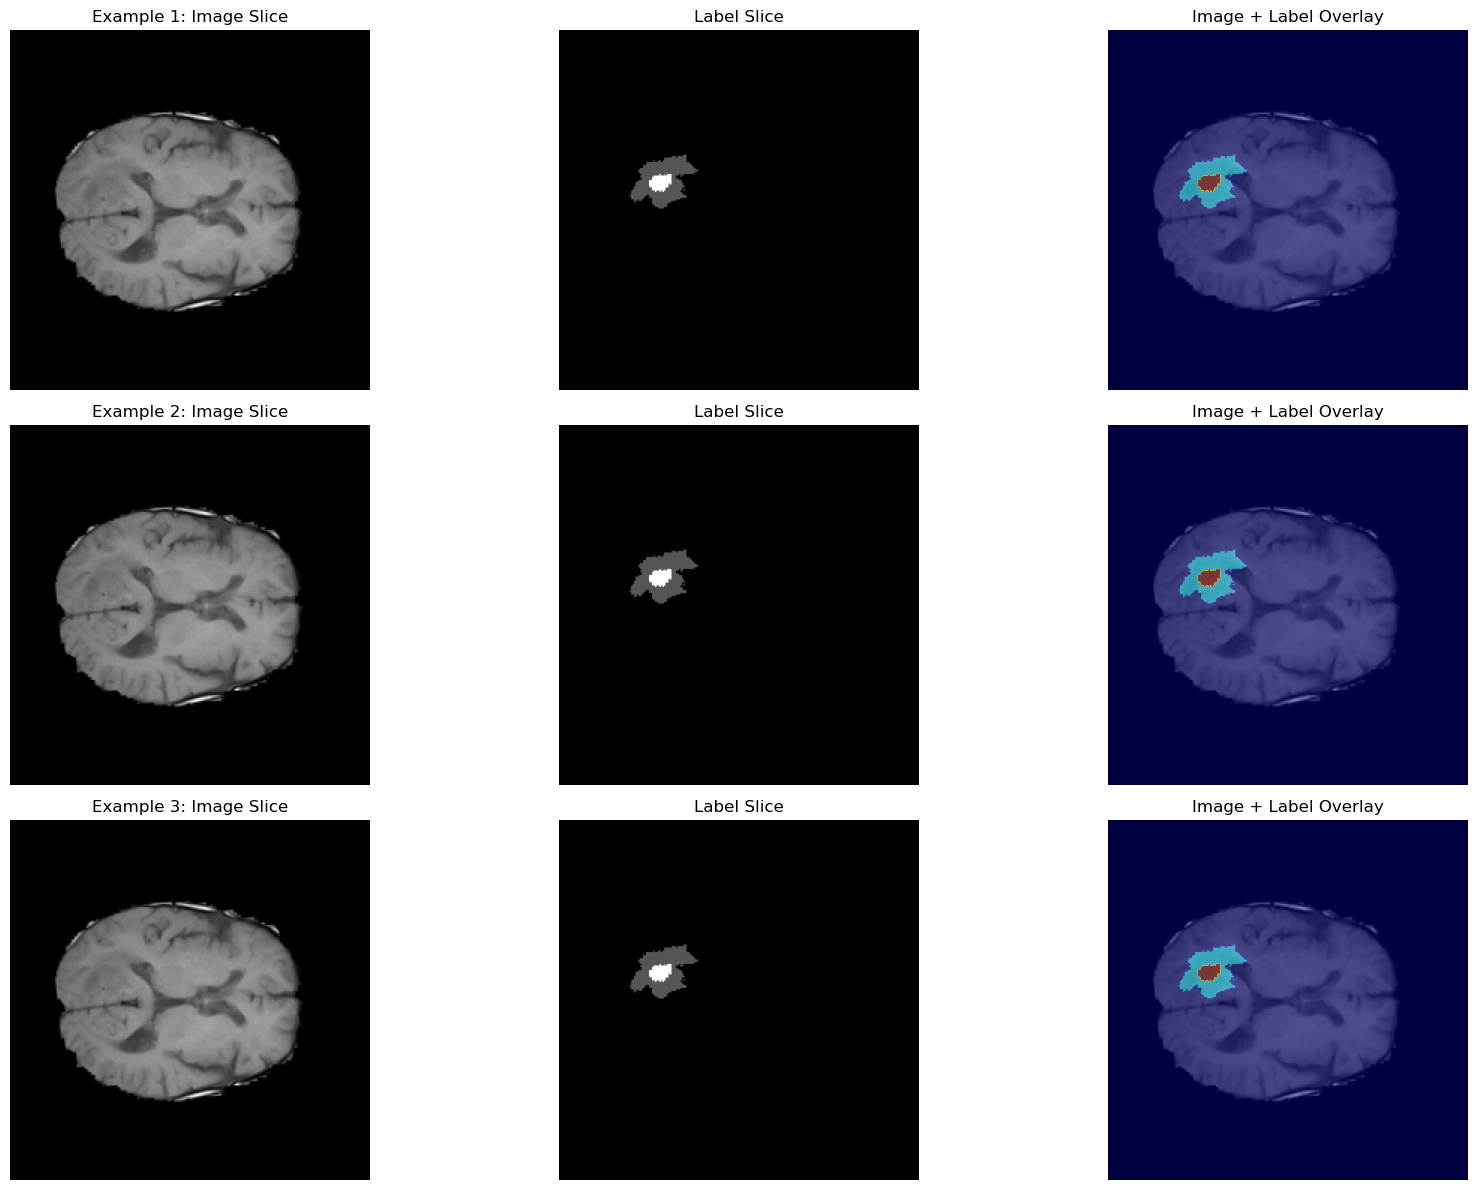

In [6]:
channel_idx = 1
display_image_label(image_paths, label_paths, num_examples, channel_idx)

Visualize the 3rd channel: 

Visualization for the channel 3:


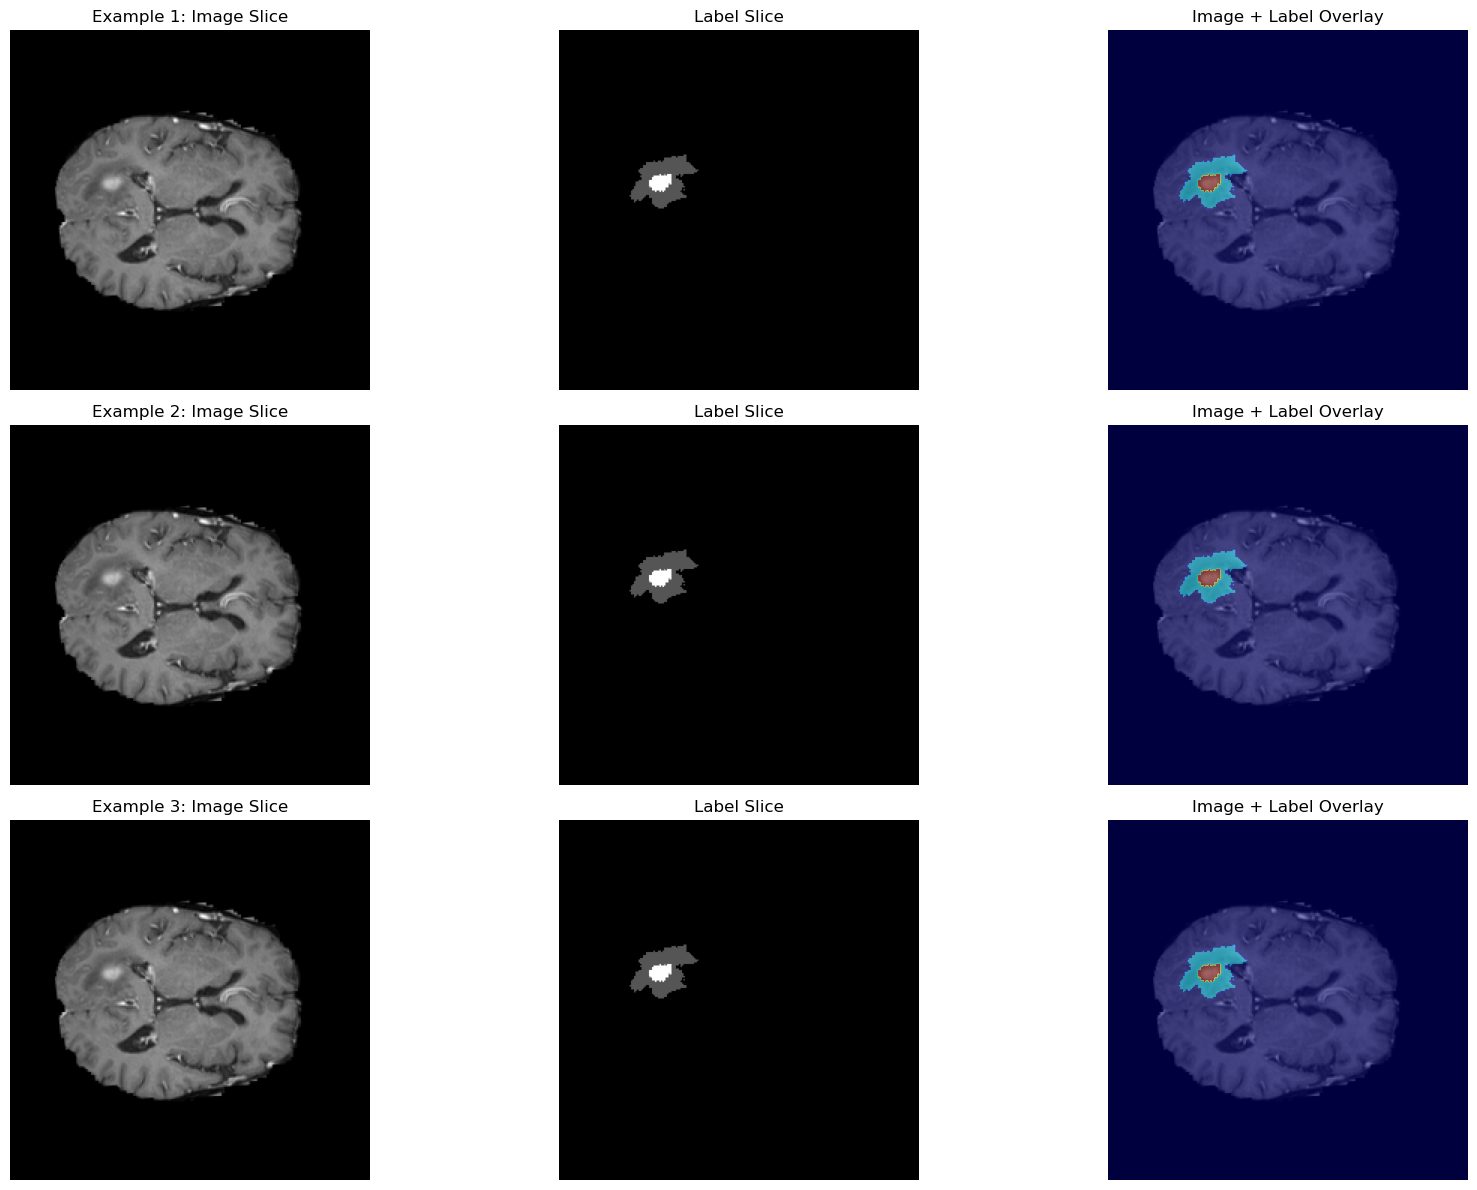

In [7]:
channel_idx = 2
display_image_label(image_paths, label_paths, num_examples, channel_idx)

Visualize the 4th channel: 

Visualization for the channel 4:


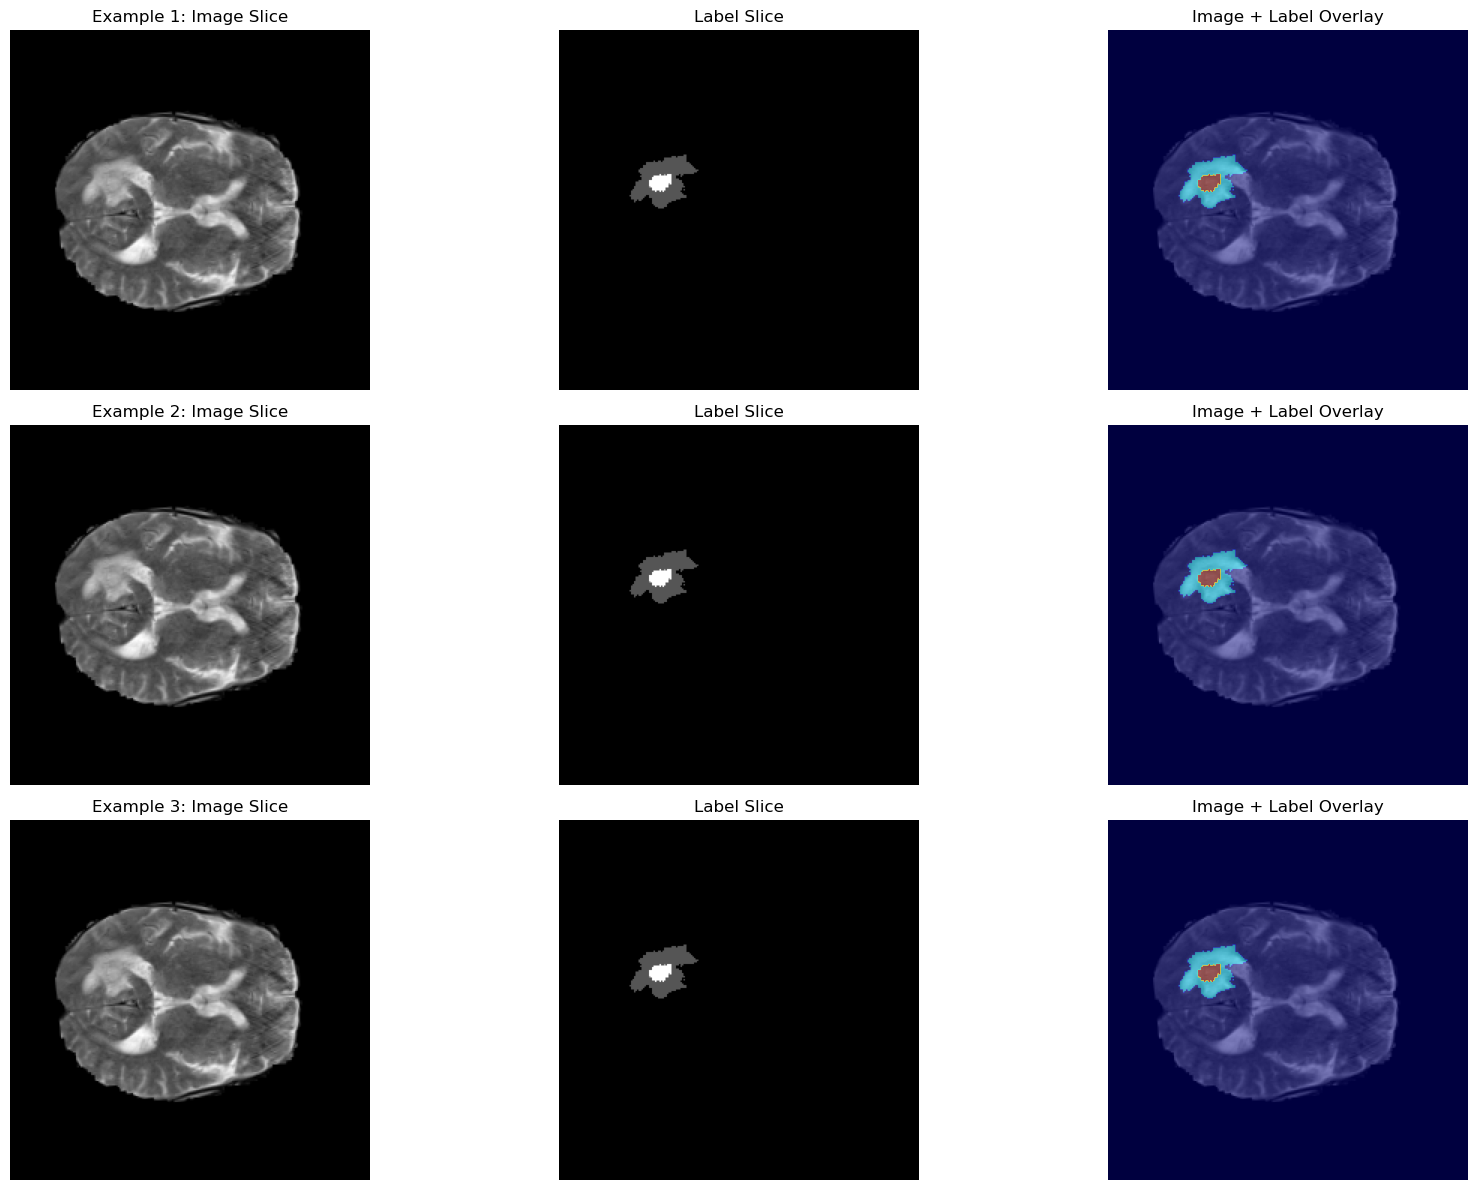

In [8]:
channel_idx = 3
display_image_label(image_paths, label_paths, num_examples, channel_idx)

## 4. Data Preprocessing

### 4.1 Normalization

Medical images vary in intensity. Normalize voxel intensities to a standard range (e.g., zero mean, unit variance). 

$$
x_{\text{norm}} = \frac{x - \mu}{\sigma}
$$

Where:
* $x$ is the original voxel intensity.
* $μ$ represents the mean intensity of all voxels in the image.
* $σ$ is the standard deviation of the voxel intensities.

In [9]:
def normalize_volume(volume):
    mean = np.mean(volume)
    std = np.std(volume)
    return (volume - mean) / (std + 1e-8)

### 4.2 Resampling / Resizing

* Different scans may have varying resolutions. To ensure consistency in voxel spacing and to make the data computationally manageable, it's necessary to resample all images to a uniform voxel spacing and/or resize the image slices.

* Using `scipy.ndimage.zoom`:
    * Function Overview: `scipy.ndimage.zoom` is a function in the SciPy library used for zooming (scaling) multi-dimensional images.
    * Zoom Factors: By specifying zoom factors for each dimension, you can scale the image accordingly. For example, a zoom factor of 0.5 will reduce the size of that dimension by half, while a factor of 2 will double it.
    * Interpolation Order: The order parameter determines the type of interpolation used. Common choices include:
        * `order=0`: Nearest-neighbor interpolation
        * `order=1`: Linear interpolation

In [10]:
from scipy.ndimage import zoom

Demo: 

In [11]:
# Assume img is a 3D medical image with shape (depth, height, width)
img = np.random.rand(100, 256, 256)  # Example image

# Define zoom factors for each dimension
# For instance, scaling depth by 0.8 and height & width by 0.5
zoom_factors = (0.8, 0.5, 0.5)

# Perform resampling using scipy.ndimage.zoom
# order=1 specifies linear interpolation
resampled_img = zoom(img, zoom=zoom_factors, order=1)

print("Original image shape:", img.shape)
print("Resampled image shape:", resampled_img.shape)

Original image shape: (100, 256, 256)
Resampled image shape: (80, 128, 128)


Define our `resize_volume` function:
* Continuous Data:
    * These are images like MRI intensity scans where the pixel values are continuous, often representing physical quantities like brightness or intensity.
    * Resampling or resizing such data requires interpolation methods like linear interpolation to maintain smooth transitions between pixel values.
    
* Segmentation Masks:
    * These are images used to label different anatomical structures or regions (e.g., organs or lesions) with discrete integer values (e.g., 0, 1, 2).
    * Resampling segmentation masks should not involve interpolation, as this could create non-integer values, which are meaningless for categorical labels. Instead, nearest-neighbor interpolation is used to preserve these integer labels.

In [12]:
def resize_volume(image, target_shape, is_seg=False):
    """
    Resize 'image' to 'target_shape' using specified interpolation order:
      - order=1 for continuous data (MRI intensities)
      - order=0 for segmentation masks (nearest-neighbor)
    """
    current_shape = image.shape
    zoom_factors = [t / c for t, c in zip(target_shape, current_shape)]
    if is_seg:
        return zoom(image, zoom_factors, order=0)
    else:
        return zoom(image, zoom_factors, order=1)

### 4.3 Data Augmentation

Data augmentation involves applying various transformations to your training images to create modified versions. This helps the model become more robust to variations it might encounter in real-world data. Common augmentation techniques include:

* Random Flips: Flipping images horizontally or vertically.
* Random Rotations: Rotating images by random angles.
* Intensity Jitter: Adjusting brightness and contrast.
* Brightness Shift: Changing the overall lightness or darkness.
* Contrast Shift: Modifying the difference between light and dark areas.

In [13]:
import random
from scipy.ndimage import rotate

#### 4.3.1 Random Flips

In [14]:
def random_flip(image, seg):
    """ Randomly flip along 0th or 1st axis. """
    if random.random() < 0.5:
        image = np.flip(image, axis=1)
        seg = np.flip(seg, axis=1)
    if random.random() < 0.5:
        image = np.flip(image, axis=0)
        seg = np.flip(seg, axis=0)
    return image, seg

#### 4.3.2 Random Rotations

In [15]:
def random_rotate(image, seg, max_angle=5):
    """ Randomly rotate the image and label within 'max_angle' degrees. """
    angle = random.uniform(-max_angle, max_angle)
    image_rot = rotate(image, angle, axes=(0,1), reshape=False, order=1)
    seg_rot = rotate(seg, angle, axes=(0,1), reshape=False, order=0)
    return image_rot, seg_rot

#### 4.3.3 Intensity Jitter

Intensity jitter refers to random alterations in the brightness and contrast of an image. However, it's important to note that intensity jitter is not applied to masks (e.g., segmentation masks) because masks typically contain categorical labels for each pixel, and altering their intensities would corrupt these labels.

**Brightness shift** involves uniformly increasing or decreasing the intensity of all pixels in an image. Here's how it works:

* Process:
    * Calculate the **mean intensity** of the image.
    * Generate a random delta (a small value) proportional to this mean.
    * Add or subtract this delta from every pixel's intensity.
    
* Effect:
    * The entire image becomes **lighter** (if you add the delta) or **darker** (if you subtract the delta).
    * **Relationships between pixel values remain unchanged**. This means that while the overall brightness changes, the relative differences between pixels (which are crucial for recognizing patterns and objects) stay the same.

**Contrast shift** changes the difference in luminance or color that makes objects distinguishable in an image. Here's how it functions:

* Process:

    * Determine the **mean intensity** of the image.
    * Choose a scaling factor (alpha).
    * Scale each pixel's value relative to the mean intensity by multiplying it with alpha.

* Effect:
    * If alpha > 1: The contrast increases. Bright areas become brighter, and dark areas become darker, making features more pronounced.
    * If alpha < 1: The contrast decreases. The difference between bright and dark areas is reduced, resulting in a flatter, less dynamic image.

In [16]:
def intensity_jitter(image, brightness_factor=0.1, contrast_factor=0.1):
    """ Randomly adjust brightness and contrast of the image. """
    # Random brightness shift
    delta = (random.random() * 2 - 1) * brightness_factor * np.mean(image)
    image = image + delta

    # Random contrast shift
    alpha = 1.0 + (random.random() * 2 - 1) * contrast_factor
    mean_val = np.mean(image)
    image = (image - mean_val) * alpha + mean_val
    return image

#### 4.4.4 Build the Pipeline

In [17]:
def preprocess_and_augment(image_path, seg_path, target_shape=None):
    image = load_nifti(image_path)
    seg = load_nifti(seg_path)
    
    # === Choose Slice ===
    depth = image.shape(-1) if image.ndim == 3 else image.shape[-2]
    slice_idx = depth // 2
    
    # If 4D (multi-channel), separate channel dimension from depth dimension
    if image.ndim == 4:  # (H, W, D, C)
        image_slice = image[:, :, slice_idx, :]
    else:
        # (H, W, D)
        image_slcie = image[:, :, slcie_idx]
        
    mask_slice = seg[:, :, slice_idx]
    
    # ===  Normalize Image Slice ===
    # Don't normalize the mask (it contains discrete labels)
    if image_slice.ndim == 2:
        image_slice = normalize_volume(image_slice)
    else:
        # For multi-channel, normalize each channel separately
        for c in range(image_slice.shape[-1]):
            image_slice[..., c] = normalize_volume(image_slice[..., c])
        
    # === Resize (Optional) ===
    if target_shape is not None:
        if image_slice.ndim == 2:
            image_slice = resize_volume(image_slice, target_shape, is_seg=False)
            mask_slice = resize_volume(mask_slice, target_shape, is_seg=True)
        else:
            # Multi-channel image -> resize each channel
            h, w, c = image_slice.shape
            # e.g., target_shape = (128, 128) for 2D
            # resize each channel individually
            resized_channels = []
            for ch in range(c):
                resized_ch = resize_volume(image_slice[..., ch], target_shape, is_seg=False)
                resized_channels.append(resized_ch)
            # Stack back along channel dim
            image = np.stack(resized_channels, axis=-1)
            # Resize mask
            seg = resize_volume(mask_slice, target_shape, is_seg=True)
        
    # === Augmentations ===
    image, seg = random_flip(image, seg)
    image, seg = random_rotate(image, seg, max_angle=10)
    image = intensity_jitter(image, brightness_factor=0.1, contrast_factor=0.1)

    return image, seg

#### 4.4.5 Comparison between Original and Processed Images and Labels

Selected random index: 435 out of 483


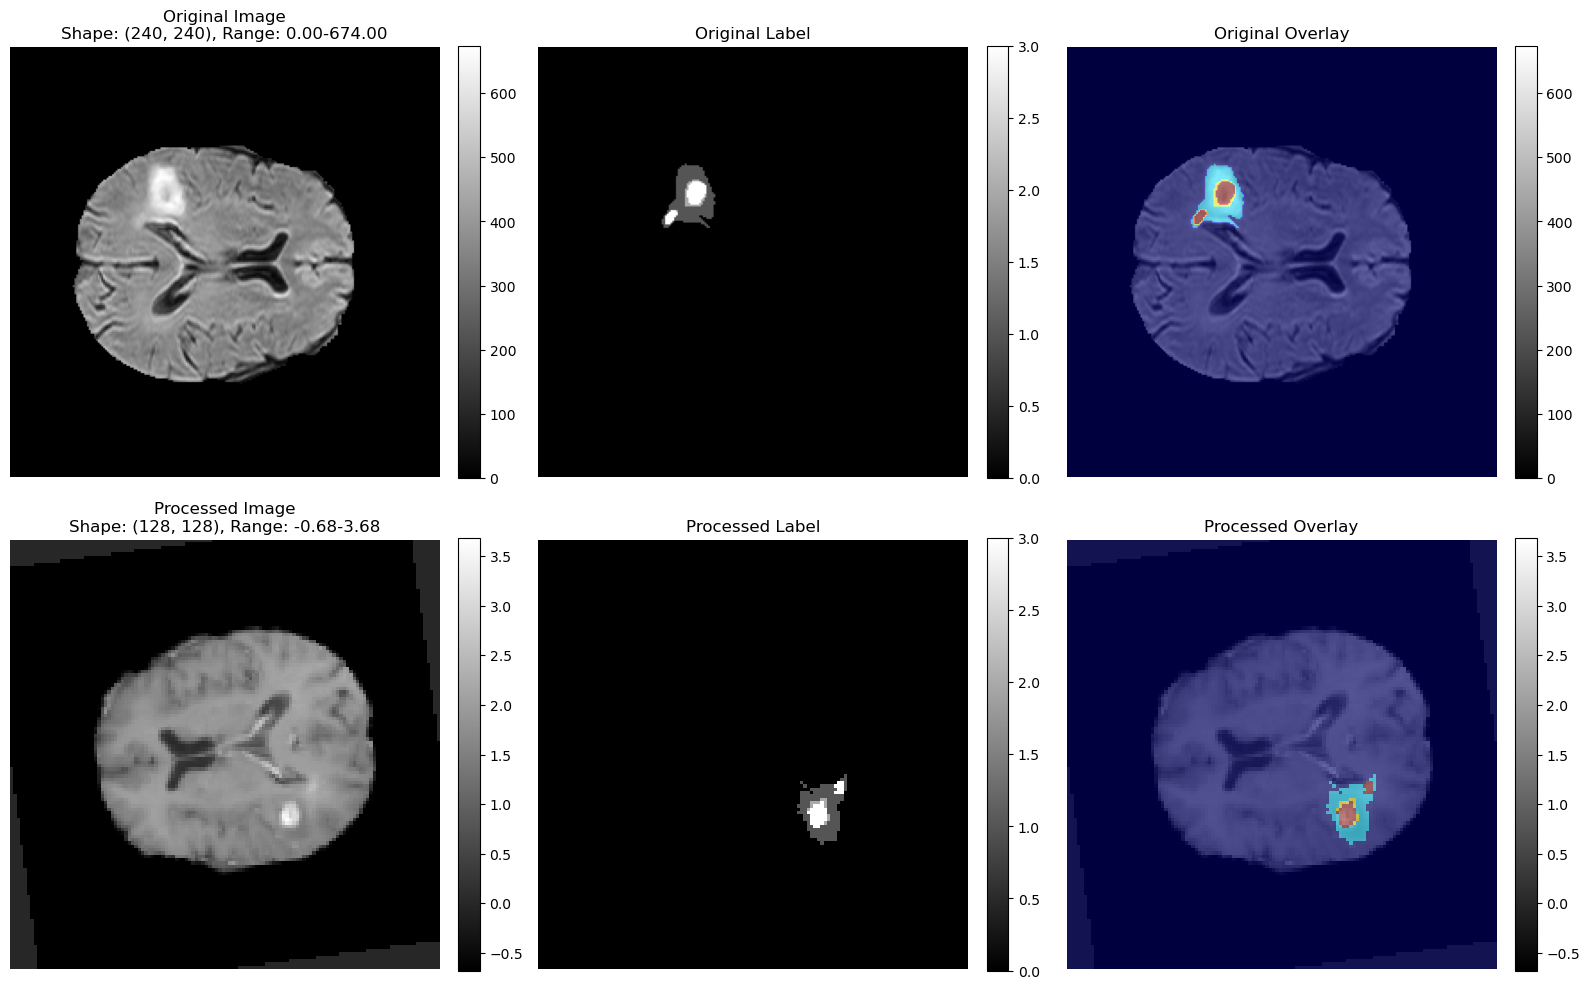

In [18]:
# Select one example at random for visualization
i = random.randint(0, len(image_paths) - 1)
print(f"Selected random index: {i} out of {len(image_paths) - 1}")

img_path = image_paths[i]
lbl_path = label_paths[i]

# Load original data (without augmentation/preprocessing)
image_nii = nib.load(img_path)
label_nii = nib.load(lbl_path)

image_original = image_nii.get_fdata()  # e.g. (H, W, D, C) or (H, W, D)
label_original = label_nii.get_fdata()

# For visualization, pick a channel and a slice
channel_idx = 0 if image_original.ndim == 4 else None
slice_idx = image_original.shape[2] // 2

if channel_idx is not None:
    img_slice_original = image_original[:, :, slice_idx, channel_idx]
else:
    img_slice_original = image_original[:, :, slice_idx]

lbl_slice_original = label_original[:, :, slice_idx]

# Now preprocess and augment the same data
target_shape = (128, 128)
image_processed, lbl_slice_processed  = preprocess_and_augment(
    img_path, lbl_path, target_shape=target_shape
)

# Choose a new slice index if shape has changed
slice_idx_processed = image_processed.shape[2] // 2
if len(image_processed.shape) == 4:
    img_slice_processed = image_processed[:, :, slice_idx_processed, channel_idx]
else:
    img_slice_processed = image_processed[:, :, slice_idx_processed]

# === Visualization: Before vs After ===
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# --- Original row ---
cax1 = axes[0][0].imshow(img_slice_original, cmap='gray')
axes[0][0].set_title(
    f'Original Image\nShape: {img_slice_original.shape}, '
    f'Range: {img_slice_original.min():.2f}-{img_slice_original.max():.2f}'
)
axes[0][0].axis('off')
plt.colorbar(cax1, ax=axes[0][0], fraction=0.046, pad=0.04) # Add colorbar to show intensity range

cax2 = axes[0][1].imshow(lbl_slice_original, cmap='gray')
axes[0][1].set_title('Original Label')
axes[0][1].axis('off')
plt.colorbar(cax2, ax=axes[0][1], fraction=0.046, pad=0.04)

cax3 = axes[0][2].imshow(img_slice_original, cmap='gray')
axes[0][2].imshow(lbl_slice_original, cmap='jet', alpha=0.5)
axes[0][2].set_title('Original Overlay')
axes[0][2].axis('off')
# For the overlay, just show the colorbar for the grayscale image
plt.colorbar(cax3, ax=axes[0][2], fraction=0.046, pad=0.04)

# --- Processed row ---
cax4 = axes[1][0].imshow(img_slice_processed, cmap='gray')
axes[1][0].set_title(
    f'Processed Image\nShape: {img_slice_processed.shape}, '
    f'Range: {img_slice_processed.min():.2f}-{img_slice_processed.max():.2f}'
)
axes[1][0].axis('off')
plt.colorbar(cax4, ax=axes[1][0], fraction=0.046, pad=0.04)

cax5 = axes[1][1].imshow(lbl_slice_processed, cmap='gray')
axes[1][1].set_title('Processed Label')
axes[1][1].axis('off')
plt.colorbar(cax5, ax=axes[1][1], fraction=0.046, pad=0.04)

cax6 = axes[1][2].imshow(img_slice_processed, cmap='gray')
axes[1][2].imshow(lbl_slice_processed, cmap='jet', alpha=0.5)
axes[1][2].set_title('Processed Overlay')
axes[1][2].axis('off')
plt.colorbar(cax6, ax=axes[1][2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

## 5. Custom Dataset 

In [19]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from graphviz import Digraph

### 5.1 Utility Function for Pipeline Visualization

In [20]:
def visualize_pipeline_graph():
    """
    Visualizes the data loading pipeline using graphviz.
    """

    dot = Digraph(comment='MedicalSegmentationDataset Pipeline')
    dot.node("A", "Load NIfTI\n(Volume)")
    dot.node("B", "Select Slice\n(Middle/Random)")
    dot.node("C", "Normalization\n(Z-Score)")
    dot.node("D", "Resize (Optional)\nMaintain Aspect Ratio")
    dot.node("E", "Random Flip/Rotate\n(Spatial Augment)")
    dot.node("F", "Intensity Jitter\n(Brightness/Contrast)")
    dot.node("G", "Convert to Torch Tensors")
    dot.node("H", "Return (image, mask)")

    # Edges
    dot.edges(["AB", "BC", "CD", "DE", "EF", "FG", "GH"])

    return dot

### 5.2 Define the Class

Let's integrate all the preprocessing steps when we define the dataset class.

In [21]:
class MedicalSegmentationDataset(Dataset):
    """
    A PyTorch Dataset for loading, preprocessing, and augmenting 2D slices
    from 3D medical volumes (e.g., Brain MRI scans).

    Args:
        image_paths (List[str]): List of paths to MRI volumes in NIfTI format.
        mask_paths (List[str]): List of paths to segmentation masks in NIfTI format.
        slice_choice (str): "middle" or "random" - how we pick the slice along the depth dimension.
        target_shape (tuple): Desired output shape for resizing (e.g., (H, W)) or None to skip resizing.
        apply_augmentation (bool): Whether to apply random flipping, rotation, and intensity jitter.
    """
    def __init__(self,
             image_paths,
             mask_paths,
             slice_choice='middle',
             target_shape=None,
             apply_augmentation=True):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.slice_choice = slice_choice
        self.target_shape = target_shape
        self.apply_augmentation = apply_augmentation
        
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        # === 1) Load Data ===
        image = load_nifti(self.image_paths[idx])
        mask = load_nifti(self.mask_paths[idx])
        
        # === 2) Choose Slice ===
        depth = image.shape[-1] if image.ndim == 3 else image.shape[-2]
        if self.slice_choice == 'middle':
            slice_idx = depth // 2
        elif self.slice_choice == 'random':
            slice_idx = random.randint(0, depth - 1)
        else:
            raise ValueError("slice_choice must be 'middle' or 'random'.")
            
        # If 4D (multi-channel), separate channel dimension from depth dimension
        if image.ndim == 4:  # (H, W, D, C)
            image_slice = image[:, :, slice_idx, :]
        else:  # (H, W, D)
            image_slice = image[:, :, slice_idx]
            
        mask_slice = mask[:, :, slice_idx]
        
        # === 3) Normalize Image Slice ===
        # Don't normalize the mask since it contains discrete labels
        if image_slice.ndim == 2:
            image_slice = normalize_volume(image_slice)
        else:
            # For multi-channel, normalize each channel separately
            for c in range(image_slice.shape[-1]):
                image_slice[..., c] = normalize_volume(image_slice[..., c])
                
        # === 4) Resize (Optional) ===
        if self.target_shape is not None:
            if image_slice.ndim == 2:
                image_slice = resize_volume(image_slice, self.target_shape, is_seg=False)
                mask_slice = resize_volume(mask_slice, self.target_shape, is_seg=True)
            else:
                # Multi-channel image -> resize each channel
                h, w, c = image_slice.shape
                # e.g., target_shape = (128, 128) for 2D
                # resize each channel individually
                resized_channels = []
                for ch in range(c):
                    resized_ch = resize_volume(image_slice[..., ch], self.target_shape, is_seg=False)
                    resized_channels.append(resized_ch)
                # Stack back along channel dim
                image_slice = np.stack(resized_channels, axis=-1)
                # Resize mask
                mask_slice = resize_volume(mask_slice, self.target_shape, is_seg=True)
                
                
        # === 5) Augment (Random Flip, Rotate, Jitter) ===
        if self.apply_augmentation:
            # If multi-channel, apply augmentations on each channel identically
            # Easiest is to unify shapes for flipping/rotation
            if image_slice.ndim == 3:
                # shape: (H, W, C)
                # we'll apply the same transformations to each channel in a loop
                # but random_flip and random_rotate operate on (H, W) arrays
                # -> stack channels along the 3rd axis, apply once
                # -> we treat channels as if they're a "stack"
                # For flipping, we can do the entire multi-channel in one operation
                image_slice, mask_slice = random_flip(image_slice, mask_slice)
                image_slice, mask_slice = random_rotate(image_slice, mask_slice, max_angle=5)
                # For intensity jitter, we do each channel separately
                for c in range(image_slice.shape[-1]):
                    image_slice[..., c] = intensity_jitter(image_slice[..., c])
            else:
                image_slice, mask_slice = random_flip(image_slice, mask_slice)
                image_slice, mask_slice = random_rotate(image_slice, mask_slice, max_angle=5)
                image_slice = intensity_jitter(image_slice)
                
        # === 6) Convert to Torch Tensor (Channels First) ===
        # If 2D single-channel: shape -> (1, H, W)
        # If 2D multi-channel: shape -> (C, H, W)
        if image_slice.ndim == 2:
            # single-channel
            image_slice = np.expand_dims(image_slice, axis=0)
            mask_slice = np.expand_dims(mask_slice, axis=0)
        else:
            # multi-channel, e.g. (H, W, C) -> (C, H, W)
            image_slice = np.transpose(image_slice, (2, 0, 1))
            mask_slice = np.expand_dims(mask_slice, axis=0)

        # Convert to torch Tensors
        image_slice = torch.from_numpy(image_slice).float()
        mask_slice = torch.from_numpy(mask_slice).long()

        return image_slice, mask_slice

### 5.3 Load the Dataset and Visualize the Pipeline

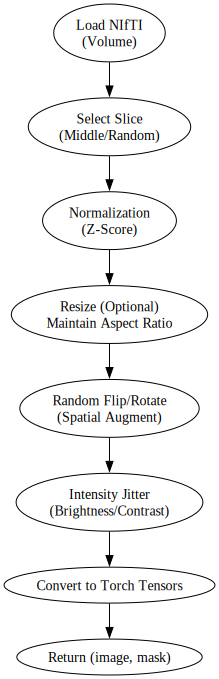

In [22]:
if __name__ == "__main__":

    image_dir = "Task01_BrainTumour/imagesTr"
    mask_dir = "Task01_BrainTumour/labelsTr"
    image_paths = sorted(glob.glob(os.path.join(image_dir, "*.nii.gz")))
    mask_paths = sorted(glob.glob(os.path.join(mask_dir, "*.nii.gz")))

    dataset = MedicalSegmentationDataset(
        image_paths=image_paths,
        mask_paths=mask_paths,
        slice_choice='middle',   
        target_shape=(256, 256),  
        apply_augmentation=True
    )

    # Create a DataLoader for parallelized loading
    dataloader = DataLoader(
        dataset,
        batch_size=20,
        shuffle=True,
        pin_memory=True
    )

    # Visualize the pipeline
    pipeline_graph = visualize_pipeline_graph()
    pipeline_graph.render("medical_seg_pipeline", view=False)  
    display(pipeline_graph)  # display inline

We can check the shapes of both the training data (`images.shape`) and the label (`masks.shape`).

In [23]:
for batch_idx, (images, masks) in enumerate(dataloader):
    print(f"Batch {batch_idx} - Images shape: {images.shape}, Masks shape: {masks.shape}")
    # images: (B, C, H, W)
    # masks:  (B, 1, H, W)
    # Perform training step, etc.
    if batch_idx == 0:
        break

Batch 0 - Images shape: torch.Size([20, 4, 256, 256]), Masks shape: torch.Size([20, 1, 256, 256])


## 6. Define the Model

In [24]:
from torch import nn

### 6.1 Model Architecture

The UNet consists of a **contracting path** (Encoder) and an **expansive path** (Decoder), which gives it the u-shaped architecture. Skip connections are applied to link the encoder and decoder layers. Here's a detailed explanation for the overall archetecture:

* **Encoder**:

    * **Goal**: To extract features while progressively reducing the spatial dimensions. 
    
    * **Structure per Stage:**:
        * Two consecutive 3×3 convolutions.
        * Each convolution is immediately followed by a ReLU activation.
        * A 2x2 max pooling operation is appied with stride 2 for downsampling.
        
    * Note that after each stage, the number of feature channels doubles.

* **BottleNeck**:

    * **Goal**: To extract high-level, abstract features and compress the information.
 
    * **Structure**: 
        * Two consecutive 3×3 convolutions, each followed by a ReLu activation.

* **Decoder**:
    
    * **Goal**: To upsample the feature maps back to the original spatial resolution while recovering spatial details by using skip connections from the encoder.

    * **Structure per Stage**:
        * 2×2 Transposed Convolution for upsampling.
        * Skip connections are applied to concatenate upsampled features with corresponding encoder features.
        * Two consecutive 3×3 convolutions, each followed by a ReLu activation.
        
    * After each stage, the number of feature channels halves. 

Here's a illustratio for the U-Net Architecture from the original paper:

![Standard Unet Archiecture](images/unet-architecture.png)

### 6.2 Helper Class

Before defining the UNet model, we can use a helper class that helps us encapsulate the two consecutive convolutions, the non-linear activation, and optional normalization.

In [25]:
class DoubleConv(nn.Module):
    """
    A helper module that performs two consecutive convolutional layers,
    each followed by a non-linear activation (e.g., ReLU). Optionally applies
    normalization (BatchNorm/InstanceNorm/GroupNorm) and/or dropout.
    This design is part of the original U-Net's "encoder" and "decoder" blocks.
    """
    def __init__(
        self,
        in_channels: int,
        out_channels: int,
        norm_type: str,
        dropout: float
    ):
        """
        Args:
            in_channels  (int): Number of input channels.
            out_channels (int): Number of output channels for the convolutions.
            norm_type    (str): Type of normalization ('batch', 'instance', 'group', or None).
            dropout     (float): Dropout probability (0.0 means no dropout).
        """
        super().__init__()
        layers = []

        # First Conv
        layers.append(nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, padding=1, bias=True))
        if norm_type=='batch':
            layers.append(nn.BatchNorm2d(out_channels))
        if norm_type=='instance':
            layers.append(nn.InstanceNorm2d(out_channels))
        if norm_type=='group':
            # e.g., group norm with 8 groups;
            layers.append(nn.GroupNorm(num_groups=8, num_channels=output_channels))
        layers.append(nn.ReLU())

        # Second Conv
        layers.append(nn.Conv2d(in_channels=out_channels, out_channels=out_channels, kernel_size=3, padding=1, bias=True))
        if norm_type == 'batch':
            layers.append(nn.BatchNorm2d(out_channels))
        elif norm_type == 'instance':
            layers.append(nn.InstanceNorm2d(out_channels, affine=True))
        elif norm_type == 'group':
            layers.append(nn.GroupNorm(num_groups=8, num_channels=out_channels))
        layers.append(nn.ReLU(inplace=True))

        # Optional dropout
        if dropout > 0.0:
            layers.append(nn.Dropout(p=dropout))

        self.net = nn.Sequential(*layers)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.net(x)
        

### 6.3 Build the Model

In [26]:
class UNet(nn.Module):
    """
    An implementation of the U-Net architecture for 2D image segmentation,
    with optional normalization and dropout layers.

    The U-Net works as follows:
    1) Contracting path (Encoder): Repeated applications of two 3x3 convolutions, each
       followed by a non-linear activation (ReLU), then a 2x2 max pooling downsampling.
    2) Bottleneck.
    3) Expansive path (Decoder): Each step upsamples via a transposed convolution,
       concatenates the corresponding encoder feature map (skip connection), and
       applies the DoubleConv block again.
    4) A final 1x1 convolution maps features to the desired number of classes.

    Args:
        in_channels  (int): Number of channels in the input image.
        out_channels (int): Number of output segmentation classes.
        base_filters (int): Number of filters in the first encoder block.
        norm_type    (str): Normalization method ('batch', 'instance', 'group', or None).
        dropout      (float): Dropout probability for each DoubleConv (0.0 = no dropout).
    """
    def __init__(
        self, 
        in_channels: int = 1,
        out_channels: int = 2,
        base_filters: int = 64,
        norm_type: str = None,
        dropout: float = .0
    ):
        super().__init__()

        # Downsampling Layer
        self.down1 = DoubleConv(in_channels=in_channels, out_channels=base_filters, norm_type=norm_type, dropout=dropout)
        self.down2 = DoubleConv(in_channels=base_filters, out_channels=base_filters*2, norm_type=norm_type, dropout=dropout)
        self.down3 = DoubleConv(in_channels=base_filters*2, out_channels=base_filters*4, norm_type=norm_type, dropout=dropout)
        self.down4 = DoubleConv(in_channels=base_filters*4, out_channels=base_filters*8, norm_type=norm_type, dropout=dropout)

        # MaxPool
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # BottleNeck
        self.bottleneck = DoubleConv(in_channels=base_filters*8, out_channels=base_filters*16, norm_type=norm_type, dropout=dropout)

        # Upsampling Layer
        self.up_trans1 = nn.ConvTranspose2d(base_filters * 16, base_filters * 8, kernel_size=2, stride=2)
        self.up_conv1 = DoubleConv(base_filters*16, base_filters*8, norm_type=norm_type, dropout=dropout)

        self.up_trans2 = nn.ConvTranspose2d(base_filters * 8, base_filters * 4, kernel_size=2, stride=2)
        self.up_conv2 = DoubleConv(base_filters * 8, base_filters * 4, norm_type=norm_type, dropout=dropout)

        self.up_trans3 = nn.ConvTranspose2d(base_filters * 4, base_filters * 2, kernel_size=2, stride=2)
        self.up_conv3 = DoubleConv(base_filters * 4, base_filters * 2, norm_type=norm_type, dropout=dropout)

        self.up_trans4 = nn.ConvTranspose2d(base_filters * 2, base_filters, kernel_size=2, stride=2)
        self.up_conv4 = DoubleConv(base_filters * 2, base_filters, norm_type=norm_type, dropout=dropout)

        self.out_conv = nn.Conv2d(base_filters, out_channels, kernel_size=1)


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Downsampleing
        d1 = self.down1(x) # (N, 64, H, W)
        p1 = self.pool(d1) # (N, 64, H/2, W/2)

        d2 = self.down2(p1)       # (N, 128, H/2, W/2)
        p2 = self.pool(d2)        # (N, 128, H/4, W/4)

        d3 = self.down3(p2)       # (N, 256, H/4, W/4)
        p3 = self.pool(d3)        # (N, 256, H/8, W/8)

        d4 = self.down4(p3)       # (N, 512, H/8, W/8)
        p4 = self.pool(d4)        # (N, 512, H/16, W/16)

        # Bottleneck
        bn = self.bottleneck(p4)  # (N, 1024, H/16, W/16)

        # Upsampling
        up1 = self.up_trans1(bn)              # (N, 512, H/8, W/8)
        cat1 = torch.cat([up1, d4], dim=1)    # (N, 512+512, H/8, W/8)
        u1 = self.up_conv1(cat1)              # (N, 512, H/8, W/8)

        up2 = self.up_trans2(u1)              # (N, 256, H/4, W/4)
        cat2 = torch.cat([up2, d3], dim=1)    # (N, 256+256, H/4, W/4)
        u2 = self.up_conv2(cat2)              # (N, 256, H/4, W/4)

        up3 = self.up_trans3(u2)              # (N, 128, H/2, W/2)
        cat3 = torch.cat([up3, d2], dim=1)    # (N, 128+128, H/2, W/2)
        u3 = self.up_conv3(cat3)              # (N, 128, H/2, W/2)

        up4 = self.up_trans4(u3)              # (N, 64, H, W)
        cat4 = torch.cat([up4, d1], dim=1)    # (N, 64+64, H, W)
        u4 = self.up_conv4(cat4)              # (N, 64, H, W)

        out = self.out_conv(u4)             # (N, out_channels, H, W)

        return out

## 7. Training 

### 7.1 Loss Function and Evaluation Metrics

The Loss Function used for this task is **Cross-Entropy Loss**. Here's an introduction:

Cross-entropy loss is used to evaluate how well the predicted probability distribution $\hat{y}$  matches the ground-truth distribution $y$.  Here's a mathematical definition of the cross entropy loss when the label is one-hot encoded:
   
$$
L_{\text{CE}} = -\frac{1}{N} \sum_{i=1}^N \sum_{c=1}^C y_{i, c} \log \bigl(\hat{p}_{i, c}\bigr)
$$  
   
Here, $N$ is the number of samples, $C$ is the number of classes, $y_{i,c}$ is 1 if the $i$-th sample belongs to class $c$ and 0 otherwise, and $\hat{p}_{i,c}$ is the predicted probability of the $i$-th sample for class $c$.
   
If the model assigns a low probability to the correct class, the loss will be high, encouraging the model during training to adjust its parameters to assign higher probabilities to the correct classes.

In [27]:
criterion = nn.CrossEntropyLoss()

Another metric that can be used as loss function for segmentation task is **Dice Coefficient**. Dice coefficient measures the overlap between two samples. It calculated by 2 * intersection divided by the total number of pixel in both images as shown below:

$$
\text{Dice}(A, B) = \frac{2 |A \cap B|}{|A| + |B|}
$$  
Where $A$ represents the set of predicted positive pixels/voxels, and $B$ represents the set of ground-truth positive pixels/voxels. The Dice score ranges from 0 (no overlap) to 1 (perfect overlap).

In this part, Dice Coefficient will be used as an evaluation metric.

In [28]:
def dice_coefficient(pred, target, smooth=1e-6):
    """
    Computes the Dice Coefficient for 2D segmentation.
    pred:  (B, C, H, W) logits or probabilities.
    target: (B, H, W) ground-truth labels [0..C-1].
    smooth: smoothing constant for numerical stability.

    Returns a float [0, 1], higher is better.
    """
    # 1) Convert predicted logits into hard class labels
    pred_labels = torch.argmax(pred, dim=1)  # shape: (B, H, W), type LongTensor

    # 2) One-hot encode predicted and target => shape: (B, C, H, W)
    num_classes = pred.shape[1]
    pred_one_hot = F.one_hot(pred_labels, num_classes=num_classes).permute(0, 3, 1, 2).float()
    target_one_hot = F.one_hot(target.long(), num_classes=num_classes).permute(0, 3, 1, 2).float()

    # 3) Compute Dice
    intersection = (pred_one_hot * target_one_hot).sum(dim=(2, 3))
    union = pred_one_hot.sum(dim=(2, 3)) + target_one_hot.sum(dim=(2, 3))

    dice_per_class = (2.0 * intersection + smooth) / (union + smooth)
    return dice_per_class.mean()  # average over classes & batch
    

### 7.2 Define Traning Function

In [29]:
def train_segmentation_model(
    model,
    train_loader,
    val_loader,
    optimizer,
    device,
    num_epochs=10,
    checkpoint_dir='checkpoints',
    checkpoint_freq=5
):
    """
    Trains a segmentation model with the given DataLoaders (train/val),
    optimizer, and device. Monitors both train and validation loss, as well
    as the Dice score over epochs. Saves checkpoints every 'checkpoint_freq' epochs.

    Args:
        model (nn.Module): The segmentation model (e.g., U-Net).
        train_loader (DataLoader): Training dataloader.
        val_loader   (DataLoader): Validation dataloader.
        optimizer (torch.optim.Optimizer): Optimizer (e.g., Adam).
        device (torch.device): 'cuda', 'mps',or 'cpu'.
        num_epochs (int): Number of epochs to train.
        checkpoint_dir (str): Directory to save model checkpoints.
        checkpoint_freq (int): Frequency (in epochs) to save checkpoints.

    Returns:
        history (dict): Contains lists of train_loss, val_loss, train_dice, val_dice for plotting.
    """
    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)

    history = {
        "train_loss": [],
        "val_loss": [],
        "train_dice": [],
        "val_dice": []
    }

    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        running_train_dice = 0.0

        # === Training Epoch ===
        for images, masks in tqdm(train_loader, desc=f"Train Epoch {epoch+1}/{num_epochs}"):
            images = images.to(device)
            masks = masks.to(device)  # shape (B, 1, H, W)

            outputs = model(images)    # shape (B, num_classes, H, W)
            loss = criterion(outputs, masks.squeeze(1))  # CrossEntropyLoss as the Loss Function

            optimizer.zero_grad() # PyTorch accumulates gradients by default.
            # Without zero_grad(), gradients from previous iterations would be added to the new ones.
            loss.backward()
            optimizer.step()

            # Accumulate metrics
            running_train_loss += loss.item() # loss.item() is used to extract the scalar value from a tensor.
            # The loss variable is a PyTorch tensor, which includes computational graph information required for backpropagation.
            running_train_dice += dice_coefficient(outputs, masks.squeeze(1)).item()

        train_loss = running_train_loss / len(train_loader)
        train_dice = running_train_dice / len(train_loader)

        # === Validation Epoch ===
        model.eval()
        running_val_loss = 0.0
        running_val_dice = 0.0
    
        with torch.no_grad():
            for images, masks in tqdm(val_loader, desc=f"Val Epoch {epoch+1}/{num_epochs}"):
                images = images.to(device)
                masks = masks.to(device)
    
                outputs = model(images)
                val_loss = criterion(outputs, masks.squeeze(1))
    
                running_val_loss += val_loss.item()
                running_val_dice += dice_coefficient(outputs, masks.squeeze(1)).item()
    
        val_loss = running_val_loss / len(val_loader)
        val_dice = running_val_dice / len(val_loader)

         # === Logging & Checkpoints ===
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["train_dice"].append(train_dice)
        history["val_dice"].append(val_dice)

        print(f"\nEpoch [{epoch+1}/{num_epochs}]"
              f" - Train Loss: {train_loss:.4f}, Train DSC: {train_dice:.4f}"
              f" | Val Loss: {val_loss:.4f}, Val DSC: {val_dice:.4f}")

        # Save checkpoint periodically
        if (epoch + 1) % checkpoint_freq == 0:
            checkpoint_path = os.path.join(checkpoint_dir, f"unet_epoch{epoch+1}.pth")
            torch.save(model.state_dict(), checkpoint_path)
            print(f"Saved checkpoint: {checkpoint_path}")

    return history

### 7.3 Start Training wiht 5-Fold Cross Validation

In [30]:
from sklearn.model_selection import KFold
from tqdm import tqdm

In [31]:
if __name__ == "__main__":

    # ---------------------------------------------
    # 1) Collect All Files
    # ---------------------------------------------
    image_dir = "Task01_BrainTumour/imagesTr"
    label_dir = "Task01_BrainTumour/labelsTr"

    all_image_paths = sorted(glob.glob(os.path.join(image_dir, "*.nii.gz")))
    all_label_paths = sorted(glob.glob(os.path.join(label_dir, "*.nii.gz")))

    print(f"Total images found: {len(all_image_paths)}")
    print(f"Total labels found: {len(all_label_paths)}")

    # Zip them together so we keep matching image/label in the same index
    zipped_paths = list(zip(all_image_paths, all_label_paths))

    # ---------------------------------------------
    # 2) Define 5-Fold Split
    # ---------------------------------------------
    num_splits = 5
    kfold = KFold(n_splits=num_splits, shuffle=True, random_state=42)

    # We'll store metrics from each fold
    fold_train_loss_history = []
    fold_val_loss_history   = []
    fold_train_dice_history = []
    fold_val_dice_history   = []

    # ---------------------------------------------
    # 3) Cross-Validation Loop
    # ---------------------------------------------
    # Set up the device
    if torch.cuda.is_available():
        device = torch.device("cuda")
        print(f"Using CUDA on {torch.cuda.get_device_name(0)}!")
    elif torch.backends.mps.is_available() and torch.backends.mps.is_built():
        device = torch.device("mps")
        print("Using MPS on Apple Silicon!")
    else:
        device = torch.device("cpu")
        print("No GPU available, falling back to CPU.")

    # Define # of epochs, batch_size, etc.
    num_epochs = 30
    batch_size = 5
    learning_rate = 1e-4
    checkpoint_dir = 'checkpoints_brain_tumor'
    
    # Define a list for validation dataset
    val_datasets = [None for _ in range(5)] 

    for fold_idx, (train_indices, val_indices) in enumerate(kfold.split(zipped_paths)):
        print("\n"+"="*40)
        print(f"Starting Fold {fold_idx+1} / {num_splits}")
        print("="*40)

        # (A) Get the train/val subsets for this fold
        train_subset = [zipped_paths[i] for i in train_indices]
        val_subset   = [zipped_paths[i] for i in val_indices]

        # Unzip into separate image/mask lists
        train_image_paths = [p[0] for p in train_subset]
        train_mask_paths  = [p[1] for p in train_subset]
        val_image_paths   = [p[0] for p in val_subset]
        val_mask_paths    = [p[1] for p in val_subset]

        # (B) Create datasets
        train_dataset = MedicalSegmentationDataset(
            train_image_paths,
            train_mask_paths,
            target_shape=(128, 128),
            slice_choice='middle'
        )
        val_dataset = MedicalSegmentationDataset(
            val_image_paths,
            val_mask_paths,
            target_shape=(128, 128),
            slice_choice='middle'
        )
        
        val_datasets[fold_idx] = val_dataset

        # (C) Create DataLoaders
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
        val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

        # (D) Initialize a fresh model & optimizer
        model = UNet(in_channels=4, out_channels=4).to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

        # (E) Train the model
        #     This calls your existing train/val loop function
        fold_history = train_segmentation_model(
            model=model,
            train_loader=train_loader,
            val_loader=val_loader,
            optimizer=optimizer,
            device=device,
            num_epochs=num_epochs,
            checkpoint_dir=os.path.join(checkpoint_dir, f"fold_{fold_idx+1}"),
            checkpoint_freq=5
        )

        # (F) Save fold metrics
        fold_train_loss_history.append(fold_history["train_loss"])
        fold_val_loss_history.append(fold_history["val_loss"])
        fold_train_dice_history.append(fold_history["train_dice"])
        fold_val_dice_history.append(fold_history["val_dice"])


Total images found: 484
Total labels found: 484
Using MPS on Apple Silicon!

Starting Fold 1 / 5


Val Epoch 1/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.80s/it]



Epoch [1/30] - Train Loss: 0.4712, Train DSC: 0.3965 | Val Loss: 0.1121, Val DSC: 0.4513


Val Epoch 2/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [2/30] - Train Loss: 0.0930, Train DSC: 0.4315 | Val Loss: 0.0762, Val DSC: 0.4513


Val Epoch 3/30: 100%|███████████████████████████| 20/20 [00:36<00:00,  1.82s/it]



Epoch [3/30] - Train Loss: 0.0757, Train DSC: 0.4648 | Val Loss: 0.0731, Val DSC: 0.5404


Val Epoch 4/30: 100%|███████████████████████████| 20/20 [00:36<00:00,  1.81s/it]



Epoch [4/30] - Train Loss: 0.0714, Train DSC: 0.5083 | Val Loss: 0.0631, Val DSC: 0.5540


Val Epoch 5/30: 100%|███████████████████████████| 20/20 [00:36<00:00,  1.84s/it]



Epoch [5/30] - Train Loss: 0.0646, Train DSC: 0.5169 | Val Loss: 0.0607, Val DSC: 0.5471
Saved checkpoint: checkpoints_brain_tumor/fold_1/unet_epoch5.pth


Val Epoch 6/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.80s/it]



Epoch [6/30] - Train Loss: 0.0627, Train DSC: 0.5248 | Val Loss: 0.0578, Val DSC: 0.5728


Val Epoch 7/30: 100%|███████████████████████████| 20/20 [00:36<00:00,  1.81s/it]



Epoch [7/30] - Train Loss: 0.0582, Train DSC: 0.5444 | Val Loss: 0.0574, Val DSC: 0.5931


Val Epoch 8/30: 100%|███████████████████████████| 20/20 [00:36<00:00,  1.80s/it]



Epoch [8/30] - Train Loss: 0.0573, Train DSC: 0.5672 | Val Loss: 0.0486, Val DSC: 0.6093


Val Epoch 9/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [9/30] - Train Loss: 0.0513, Train DSC: 0.5919 | Val Loss: 0.0470, Val DSC: 0.6193


Val Epoch 10/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [10/30] - Train Loss: 0.0506, Train DSC: 0.6164 | Val Loss: 0.0428, Val DSC: 0.6447
Saved checkpoint: checkpoints_brain_tumor/fold_1/unet_epoch10.pth


Val Epoch 11/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [11/30] - Train Loss: 0.0462, Train DSC: 0.6298 | Val Loss: 0.0428, Val DSC: 0.6609


Val Epoch 12/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [12/30] - Train Loss: 0.0444, Train DSC: 0.6570 | Val Loss: 0.0415, Val DSC: 0.6601


Val Epoch 13/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [13/30] - Train Loss: 0.0453, Train DSC: 0.6481 | Val Loss: 0.0447, Val DSC: 0.6697


Val Epoch 14/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [14/30] - Train Loss: 0.0430, Train DSC: 0.6595 | Val Loss: 0.0391, Val DSC: 0.6666


Val Epoch 15/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.76s/it]



Epoch [15/30] - Train Loss: 0.0400, Train DSC: 0.6655 | Val Loss: 0.0493, Val DSC: 0.6374
Saved checkpoint: checkpoints_brain_tumor/fold_1/unet_epoch15.pth


Val Epoch 16/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [16/30] - Train Loss: 0.0390, Train DSC: 0.6685 | Val Loss: 0.0382, Val DSC: 0.6671


Val Epoch 17/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [17/30] - Train Loss: 0.0417, Train DSC: 0.6650 | Val Loss: 0.0382, Val DSC: 0.6838


Val Epoch 18/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [18/30] - Train Loss: 0.0386, Train DSC: 0.6671 | Val Loss: 0.0354, Val DSC: 0.6764


Val Epoch 19/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [19/30] - Train Loss: 0.0365, Train DSC: 0.6814 | Val Loss: 0.0378, Val DSC: 0.6755


Val Epoch 20/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [20/30] - Train Loss: 0.0386, Train DSC: 0.6706 | Val Loss: 0.0341, Val DSC: 0.6910
Saved checkpoint: checkpoints_brain_tumor/fold_1/unet_epoch20.pth


Val Epoch 21/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [21/30] - Train Loss: 0.0384, Train DSC: 0.6750 | Val Loss: 0.0338, Val DSC: 0.6838


Val Epoch 22/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [22/30] - Train Loss: 0.0378, Train DSC: 0.6725 | Val Loss: 0.0325, Val DSC: 0.6886


Val Epoch 23/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [23/30] - Train Loss: 0.0350, Train DSC: 0.6896 | Val Loss: 0.0345, Val DSC: 0.6919


Val Epoch 24/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [24/30] - Train Loss: 0.0361, Train DSC: 0.6819 | Val Loss: 0.0331, Val DSC: 0.6855


Val Epoch 25/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [25/30] - Train Loss: 0.0351, Train DSC: 0.6891 | Val Loss: 0.0347, Val DSC: 0.6874
Saved checkpoint: checkpoints_brain_tumor/fold_1/unet_epoch25.pth


Val Epoch 26/30: 100%|██████████████████████████| 20/20 [00:36<00:00,  1.80s/it]



Epoch [26/30] - Train Loss: 0.0357, Train DSC: 0.6869 | Val Loss: 0.0340, Val DSC: 0.6868


Val Epoch 27/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [27/30] - Train Loss: 0.0362, Train DSC: 0.6796 | Val Loss: 0.0320, Val DSC: 0.6979


Val Epoch 28/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [28/30] - Train Loss: 0.0331, Train DSC: 0.6911 | Val Loss: 0.0311, Val DSC: 0.6938


Val Epoch 29/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [29/30] - Train Loss: 0.0339, Train DSC: 0.6993 | Val Loss: 0.0320, Val DSC: 0.7025


Val Epoch 30/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [30/30] - Train Loss: 0.0362, Train DSC: 0.6879 | Val Loss: 0.0368, Val DSC: 0.6729
Saved checkpoint: checkpoints_brain_tumor/fold_1/unet_epoch30.pth

Starting Fold 2 / 5


Val Epoch 1/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [1/30] - Train Loss: 0.4942, Train DSC: 0.3803 | Val Loss: 0.1132, Val DSC: 0.4185


Val Epoch 2/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [2/30] - Train Loss: 0.0910, Train DSC: 0.4379 | Val Loss: 0.0812, Val DSC: 0.4670


Val Epoch 3/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [3/30] - Train Loss: 0.0765, Train DSC: 0.4933 | Val Loss: 0.0714, Val DSC: 0.5005


Val Epoch 4/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [4/30] - Train Loss: 0.0702, Train DSC: 0.5186 | Val Loss: 0.0658, Val DSC: 0.5174


Val Epoch 5/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [5/30] - Train Loss: 0.0609, Train DSC: 0.5505 | Val Loss: 0.0573, Val DSC: 0.5608
Saved checkpoint: checkpoints_brain_tumor/fold_2/unet_epoch5.pth


Val Epoch 6/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [6/30] - Train Loss: 0.0600, Train DSC: 0.5770 | Val Loss: 0.0581, Val DSC: 0.5595


Val Epoch 7/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.80s/it]



Epoch [7/30] - Train Loss: 0.0533, Train DSC: 0.5976 | Val Loss: 0.0490, Val DSC: 0.6340


Val Epoch 8/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [8/30] - Train Loss: 0.0473, Train DSC: 0.6218 | Val Loss: 0.0478, Val DSC: 0.6320


Val Epoch 9/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [9/30] - Train Loss: 0.0446, Train DSC: 0.6259 | Val Loss: 0.0444, Val DSC: 0.6419


Val Epoch 10/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [10/30] - Train Loss: 0.0454, Train DSC: 0.6351 | Val Loss: 0.0459, Val DSC: 0.6592
Saved checkpoint: checkpoints_brain_tumor/fold_2/unet_epoch10.pth


Val Epoch 11/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [11/30] - Train Loss: 0.0430, Train DSC: 0.6553 | Val Loss: 0.0416, Val DSC: 0.6560


Val Epoch 12/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [12/30] - Train Loss: 0.0415, Train DSC: 0.6503 | Val Loss: 0.0455, Val DSC: 0.6549


Val Epoch 13/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [13/30] - Train Loss: 0.0421, Train DSC: 0.6549 | Val Loss: 0.0601, Val DSC: 0.6143


Val Epoch 14/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [14/30] - Train Loss: 0.0416, Train DSC: 0.6598 | Val Loss: 0.0396, Val DSC: 0.6775


Val Epoch 15/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [15/30] - Train Loss: 0.0393, Train DSC: 0.6781 | Val Loss: 0.0415, Val DSC: 0.6700
Saved checkpoint: checkpoints_brain_tumor/fold_2/unet_epoch15.pth


Val Epoch 16/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [16/30] - Train Loss: 0.0383, Train DSC: 0.6762 | Val Loss: 0.0487, Val DSC: 0.6566


Val Epoch 17/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [17/30] - Train Loss: 0.0383, Train DSC: 0.6742 | Val Loss: 0.0392, Val DSC: 0.6687


Val Epoch 18/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [18/30] - Train Loss: 0.0373, Train DSC: 0.6726 | Val Loss: 0.0380, Val DSC: 0.6832


Val Epoch 19/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [19/30] - Train Loss: 0.0378, Train DSC: 0.6728 | Val Loss: 0.0375, Val DSC: 0.6789


Val Epoch 20/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [20/30] - Train Loss: 0.0345, Train DSC: 0.6886 | Val Loss: 0.0383, Val DSC: 0.6828
Saved checkpoint: checkpoints_brain_tumor/fold_2/unet_epoch20.pth


Val Epoch 21/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [21/30] - Train Loss: 0.0341, Train DSC: 0.6917 | Val Loss: 0.0441, Val DSC: 0.6517


Val Epoch 22/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [22/30] - Train Loss: 0.0352, Train DSC: 0.6813 | Val Loss: 0.0356, Val DSC: 0.6885


Val Epoch 23/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [23/30] - Train Loss: 0.0338, Train DSC: 0.6906 | Val Loss: 0.0365, Val DSC: 0.6800


Val Epoch 24/30: 100%|██████████████████████████| 20/20 [00:36<00:00,  1.81s/it]



Epoch [24/30] - Train Loss: 0.0342, Train DSC: 0.6903 | Val Loss: 0.0366, Val DSC: 0.6813


Val Epoch 25/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [25/30] - Train Loss: 0.0345, Train DSC: 0.6856 | Val Loss: 0.0369, Val DSC: 0.6810
Saved checkpoint: checkpoints_brain_tumor/fold_2/unet_epoch25.pth


Val Epoch 26/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.80s/it]



Epoch [26/30] - Train Loss: 0.0338, Train DSC: 0.6908 | Val Loss: 0.0361, Val DSC: 0.6965


Val Epoch 27/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.80s/it]



Epoch [27/30] - Train Loss: 0.0316, Train DSC: 0.7032 | Val Loss: 0.0363, Val DSC: 0.6887


Val Epoch 28/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [28/30] - Train Loss: 0.0317, Train DSC: 0.7031 | Val Loss: 0.0359, Val DSC: 0.6935


Val Epoch 29/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [29/30] - Train Loss: 0.0314, Train DSC: 0.7099 | Val Loss: 0.0346, Val DSC: 0.7088


Val Epoch 30/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [30/30] - Train Loss: 0.0322, Train DSC: 0.6977 | Val Loss: 0.0366, Val DSC: 0.6984
Saved checkpoint: checkpoints_brain_tumor/fold_2/unet_epoch30.pth

Starting Fold 3 / 5


Val Epoch 1/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [1/30] - Train Loss: 0.5278, Train DSC: 0.3775 | Val Loss: 0.1141, Val DSC: 0.4237


Val Epoch 2/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [2/30] - Train Loss: 0.0958, Train DSC: 0.4385 | Val Loss: 0.0775, Val DSC: 0.4237


Val Epoch 3/30: 100%|███████████████████████████| 20/20 [00:36<00:00,  1.80s/it]



Epoch [3/30] - Train Loss: 0.0765, Train DSC: 0.4834 | Val Loss: 0.0713, Val DSC: 0.4906


Val Epoch 4/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [4/30] - Train Loss: 0.0672, Train DSC: 0.5203 | Val Loss: 0.0661, Val DSC: 0.5144


Val Epoch 5/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [5/30] - Train Loss: 0.0649, Train DSC: 0.5282 | Val Loss: 0.0585, Val DSC: 0.5224
Saved checkpoint: checkpoints_brain_tumor/fold_3/unet_epoch5.pth


Val Epoch 6/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [6/30] - Train Loss: 0.0599, Train DSC: 0.5403 | Val Loss: 0.0590, Val DSC: 0.5183


Val Epoch 7/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [7/30] - Train Loss: 0.0573, Train DSC: 0.5589 | Val Loss: 0.0533, Val DSC: 0.5411


Val Epoch 8/30: 100%|███████████████████████████| 20/20 [00:36<00:00,  1.80s/it]



Epoch [8/30] - Train Loss: 0.0550, Train DSC: 0.5768 | Val Loss: 0.0499, Val DSC: 0.5719


Val Epoch 9/30: 100%|███████████████████████████| 20/20 [00:36<00:00,  1.80s/it]



Epoch [9/30] - Train Loss: 0.0501, Train DSC: 0.5945 | Val Loss: 0.0497, Val DSC: 0.5871


Val Epoch 10/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [10/30] - Train Loss: 0.0504, Train DSC: 0.6055 | Val Loss: 0.0539, Val DSC: 0.5886
Saved checkpoint: checkpoints_brain_tumor/fold_3/unet_epoch10.pth


Val Epoch 11/30: 100%|██████████████████████████| 20/20 [00:36<00:00,  1.80s/it]



Epoch [11/30] - Train Loss: 0.0469, Train DSC: 0.6281 | Val Loss: 0.0536, Val DSC: 0.5952


Val Epoch 12/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.80s/it]



Epoch [12/30] - Train Loss: 0.0459, Train DSC: 0.6384 | Val Loss: 0.0485, Val DSC: 0.6062


Val Epoch 13/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [13/30] - Train Loss: 0.0431, Train DSC: 0.6536 | Val Loss: 0.0426, Val DSC: 0.6372


Val Epoch 14/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [14/30] - Train Loss: 0.0401, Train DSC: 0.6567 | Val Loss: 0.0409, Val DSC: 0.6522


Val Epoch 15/30: 100%|██████████████████████████| 20/20 [00:36<00:00,  1.80s/it]



Epoch [15/30] - Train Loss: 0.0408, Train DSC: 0.6639 | Val Loss: 0.0397, Val DSC: 0.6694
Saved checkpoint: checkpoints_brain_tumor/fold_3/unet_epoch15.pth


Val Epoch 16/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [16/30] - Train Loss: 0.0386, Train DSC: 0.6684 | Val Loss: 0.0434, Val DSC: 0.6510


Val Epoch 17/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [17/30] - Train Loss: 0.0389, Train DSC: 0.6669 | Val Loss: 0.0380, Val DSC: 0.6592


Val Epoch 18/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [18/30] - Train Loss: 0.0380, Train DSC: 0.6791 | Val Loss: 0.0363, Val DSC: 0.6739


Val Epoch 19/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.80s/it]



Epoch [19/30] - Train Loss: 0.0368, Train DSC: 0.6821 | Val Loss: 0.0355, Val DSC: 0.6785


Val Epoch 20/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.80s/it]



Epoch [20/30] - Train Loss: 0.0390, Train DSC: 0.6776 | Val Loss: 0.0370, Val DSC: 0.6804
Saved checkpoint: checkpoints_brain_tumor/fold_3/unet_epoch20.pth


Val Epoch 21/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [21/30] - Train Loss: 0.0356, Train DSC: 0.6857 | Val Loss: 0.0346, Val DSC: 0.6911


Val Epoch 22/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [22/30] - Train Loss: 0.0357, Train DSC: 0.6859 | Val Loss: 0.0337, Val DSC: 0.6839


Val Epoch 23/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [23/30] - Train Loss: 0.0347, Train DSC: 0.6886 | Val Loss: 0.0348, Val DSC: 0.6821


Val Epoch 24/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [24/30] - Train Loss: 0.0349, Train DSC: 0.6875 | Val Loss: 0.0333, Val DSC: 0.6833


Val Epoch 25/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [25/30] - Train Loss: 0.0351, Train DSC: 0.6878 | Val Loss: 0.0349, Val DSC: 0.6959
Saved checkpoint: checkpoints_brain_tumor/fold_3/unet_epoch25.pth


Val Epoch 26/30: 100%|██████████████████████████| 20/20 [00:36<00:00,  1.83s/it]



Epoch [26/30] - Train Loss: 0.0359, Train DSC: 0.6847 | Val Loss: 0.0340, Val DSC: 0.7025


Val Epoch 27/30: 100%|██████████████████████████| 20/20 [00:36<00:00,  1.81s/it]



Epoch [27/30] - Train Loss: 0.0334, Train DSC: 0.7003 | Val Loss: 0.0339, Val DSC: 0.6942


Val Epoch 28/30: 100%|██████████████████████████| 20/20 [00:36<00:00,  1.84s/it]



Epoch [28/30] - Train Loss: 0.0331, Train DSC: 0.6950 | Val Loss: 0.0331, Val DSC: 0.6904


Val Epoch 29/30: 100%|██████████████████████████| 20/20 [00:36<00:00,  1.81s/it]



Epoch [29/30] - Train Loss: 0.0333, Train DSC: 0.6950 | Val Loss: 0.0311, Val DSC: 0.7054


Val Epoch 30/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.80s/it]



Epoch [30/30] - Train Loss: 0.0336, Train DSC: 0.6999 | Val Loss: 0.0367, Val DSC: 0.6777
Saved checkpoint: checkpoints_brain_tumor/fold_3/unet_epoch30.pth

Starting Fold 4 / 5


Val Epoch 1/30: 100%|███████████████████████████| 20/20 [00:36<00:00,  1.81s/it]



Epoch [1/30] - Train Loss: 0.4876, Train DSC: 0.3900 | Val Loss: 0.1267, Val DSC: 0.4297


Val Epoch 2/30: 100%|███████████████████████████| 20/20 [00:36<00:00,  1.80s/it]



Epoch [2/30] - Train Loss: 0.0909, Train DSC: 0.4404 | Val Loss: 0.0833, Val DSC: 0.4669


Val Epoch 3/30: 100%|███████████████████████████| 20/20 [00:36<00:00,  1.81s/it]



Epoch [3/30] - Train Loss: 0.0727, Train DSC: 0.4882 | Val Loss: 0.0708, Val DSC: 0.4971


Val Epoch 4/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [4/30] - Train Loss: 0.0684, Train DSC: 0.5153 | Val Loss: 0.0746, Val DSC: 0.5159


Val Epoch 5/30: 100%|███████████████████████████| 20/20 [00:36<00:00,  1.81s/it]



Epoch [5/30] - Train Loss: 0.0641, Train DSC: 0.5291 | Val Loss: 0.0766, Val DSC: 0.5206
Saved checkpoint: checkpoints_brain_tumor/fold_4/unet_epoch5.pth


Val Epoch 6/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [6/30] - Train Loss: 0.0614, Train DSC: 0.5312 | Val Loss: 0.0637, Val DSC: 0.5300


Val Epoch 7/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [7/30] - Train Loss: 0.0575, Train DSC: 0.5342 | Val Loss: 0.0599, Val DSC: 0.5264


Val Epoch 8/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.80s/it]



Epoch [8/30] - Train Loss: 0.0544, Train DSC: 0.5562 | Val Loss: 0.0707, Val DSC: 0.5463


Val Epoch 9/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [9/30] - Train Loss: 0.0501, Train DSC: 0.5889 | Val Loss: 0.0482, Val DSC: 0.5925


Val Epoch 10/30: 100%|██████████████████████████| 20/20 [00:36<00:00,  1.80s/it]



Epoch [10/30] - Train Loss: 0.0453, Train DSC: 0.6112 | Val Loss: 0.0472, Val DSC: 0.5948
Saved checkpoint: checkpoints_brain_tumor/fold_4/unet_epoch10.pth


Val Epoch 11/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [11/30] - Train Loss: 0.0437, Train DSC: 0.6227 | Val Loss: 0.0446, Val DSC: 0.6356


Val Epoch 12/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [12/30] - Train Loss: 0.0454, Train DSC: 0.6400 | Val Loss: 0.0484, Val DSC: 0.6440


Val Epoch 13/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.80s/it]



Epoch [13/30] - Train Loss: 0.0419, Train DSC: 0.6467 | Val Loss: 0.0455, Val DSC: 0.6579


Val Epoch 14/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.80s/it]



Epoch [14/30] - Train Loss: 0.0406, Train DSC: 0.6576 | Val Loss: 0.0418, Val DSC: 0.6659


Val Epoch 15/30: 100%|██████████████████████████| 20/20 [00:36<00:00,  1.81s/it]



Epoch [15/30] - Train Loss: 0.0419, Train DSC: 0.6561 | Val Loss: 0.0441, Val DSC: 0.6549
Saved checkpoint: checkpoints_brain_tumor/fold_4/unet_epoch15.pth


Val Epoch 16/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.80s/it]



Epoch [16/30] - Train Loss: 0.0373, Train DSC: 0.6655 | Val Loss: 0.0429, Val DSC: 0.6778


Val Epoch 17/30: 100%|██████████████████████████| 20/20 [00:36<00:00,  1.81s/it]



Epoch [17/30] - Train Loss: 0.0373, Train DSC: 0.6673 | Val Loss: 0.0417, Val DSC: 0.6955


Val Epoch 18/30: 100%|██████████████████████████| 20/20 [00:36<00:00,  1.82s/it]



Epoch [18/30] - Train Loss: 0.0424, Train DSC: 0.6544 | Val Loss: 0.0450, Val DSC: 0.6693


Val Epoch 19/30: 100%|██████████████████████████| 20/20 [00:36<00:00,  1.82s/it]



Epoch [19/30] - Train Loss: 0.0376, Train DSC: 0.6745 | Val Loss: 0.0453, Val DSC: 0.6613


Val Epoch 20/30: 100%|██████████████████████████| 20/20 [00:36<00:00,  1.83s/it]



Epoch [20/30] - Train Loss: 0.0379, Train DSC: 0.6637 | Val Loss: 0.0421, Val DSC: 0.6892
Saved checkpoint: checkpoints_brain_tumor/fold_4/unet_epoch20.pth


Val Epoch 21/30: 100%|██████████████████████████| 20/20 [00:36<00:00,  1.82s/it]



Epoch [21/30] - Train Loss: 0.0355, Train DSC: 0.6833 | Val Loss: 0.0370, Val DSC: 0.6973


Val Epoch 22/30: 100%|██████████████████████████| 20/20 [00:36<00:00,  1.81s/it]



Epoch [22/30] - Train Loss: 0.0365, Train DSC: 0.6743 | Val Loss: 0.0369, Val DSC: 0.6837


Val Epoch 23/30: 100%|██████████████████████████| 20/20 [00:36<00:00,  1.80s/it]



Epoch [23/30] - Train Loss: 0.0338, Train DSC: 0.6875 | Val Loss: 0.0365, Val DSC: 0.6956


Val Epoch 24/30: 100%|██████████████████████████| 20/20 [00:36<00:00,  1.81s/it]



Epoch [24/30] - Train Loss: 0.0337, Train DSC: 0.6837 | Val Loss: 0.0365, Val DSC: 0.6909


Val Epoch 25/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [25/30] - Train Loss: 0.0333, Train DSC: 0.6888 | Val Loss: 0.0346, Val DSC: 0.7041
Saved checkpoint: checkpoints_brain_tumor/fold_4/unet_epoch25.pth


Val Epoch 26/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.80s/it]



Epoch [26/30] - Train Loss: 0.0321, Train DSC: 0.6930 | Val Loss: 0.0364, Val DSC: 0.7038


Val Epoch 27/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [27/30] - Train Loss: 0.0352, Train DSC: 0.6818 | Val Loss: 0.0354, Val DSC: 0.6920


Val Epoch 28/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [28/30] - Train Loss: 0.0337, Train DSC: 0.6884 | Val Loss: 0.0380, Val DSC: 0.6813


Val Epoch 29/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [29/30] - Train Loss: 0.0333, Train DSC: 0.6816 | Val Loss: 0.0338, Val DSC: 0.7165


Val Epoch 30/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.80s/it]



Epoch [30/30] - Train Loss: 0.0313, Train DSC: 0.6973 | Val Loss: 0.0342, Val DSC: 0.7240
Saved checkpoint: checkpoints_brain_tumor/fold_4/unet_epoch30.pth

Starting Fold 5 / 5


Val Epoch 1/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [1/30] - Train Loss: 0.4816, Train DSC: 0.3841 | Val Loss: 0.1023, Val DSC: 0.4389


Val Epoch 2/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [2/30] - Train Loss: 0.0881, Train DSC: 0.4318 | Val Loss: 0.0769, Val DSC: 0.4491


Val Epoch 3/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.76s/it]



Epoch [3/30] - Train Loss: 0.0801, Train DSC: 0.4770 | Val Loss: 0.0706, Val DSC: 0.4979


Val Epoch 4/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.76s/it]



Epoch [4/30] - Train Loss: 0.0697, Train DSC: 0.5165 | Val Loss: 0.0654, Val DSC: 0.5144


Val Epoch 5/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.76s/it]



Epoch [5/30] - Train Loss: 0.0642, Train DSC: 0.5246 | Val Loss: 0.0625, Val DSC: 0.5632
Saved checkpoint: checkpoints_brain_tumor/fold_5/unet_epoch5.pth


Val Epoch 6/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.76s/it]



Epoch [6/30] - Train Loss: 0.0604, Train DSC: 0.5475 | Val Loss: 0.0550, Val DSC: 0.5746


Val Epoch 7/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.76s/it]



Epoch [7/30] - Train Loss: 0.0574, Train DSC: 0.5791 | Val Loss: 0.0700, Val DSC: 0.6019


Val Epoch 8/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.76s/it]



Epoch [8/30] - Train Loss: 0.0519, Train DSC: 0.6088 | Val Loss: 0.0450, Val DSC: 0.6178


Val Epoch 9/30: 100%|███████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [9/30] - Train Loss: 0.0461, Train DSC: 0.6384 | Val Loss: 0.0472, Val DSC: 0.6369


Val Epoch 10/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [10/30] - Train Loss: 0.0436, Train DSC: 0.6519 | Val Loss: 0.0396, Val DSC: 0.6561
Saved checkpoint: checkpoints_brain_tumor/fold_5/unet_epoch10.pth


Val Epoch 11/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.78s/it]



Epoch [11/30] - Train Loss: 0.0423, Train DSC: 0.6612 | Val Loss: 0.0374, Val DSC: 0.6499


Val Epoch 12/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [12/30] - Train Loss: 0.0445, Train DSC: 0.6506 | Val Loss: 0.0448, Val DSC: 0.6525


Val Epoch 13/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [13/30] - Train Loss: 0.0397, Train DSC: 0.6688 | Val Loss: 0.0352, Val DSC: 0.6676


Val Epoch 14/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [14/30] - Train Loss: 0.0383, Train DSC: 0.6736 | Val Loss: 0.0357, Val DSC: 0.6727


Val Epoch 15/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.76s/it]



Epoch [15/30] - Train Loss: 0.0390, Train DSC: 0.6714 | Val Loss: 0.0433, Val DSC: 0.6425
Saved checkpoint: checkpoints_brain_tumor/fold_5/unet_epoch15.pth


Val Epoch 16/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.76s/it]



Epoch [16/30] - Train Loss: 0.0403, Train DSC: 0.6709 | Val Loss: 0.0452, Val DSC: 0.6430


Val Epoch 17/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [17/30] - Train Loss: 0.0396, Train DSC: 0.6680 | Val Loss: 0.0365, Val DSC: 0.6684


Val Epoch 18/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.76s/it]



Epoch [18/30] - Train Loss: 0.0390, Train DSC: 0.6742 | Val Loss: 0.0361, Val DSC: 0.6649


Val Epoch 19/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [19/30] - Train Loss: 0.0366, Train DSC: 0.6813 | Val Loss: 0.0412, Val DSC: 0.6623


Val Epoch 20/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [20/30] - Train Loss: 0.0379, Train DSC: 0.6801 | Val Loss: 0.0337, Val DSC: 0.6805
Saved checkpoint: checkpoints_brain_tumor/fold_5/unet_epoch20.pth


Val Epoch 21/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [21/30] - Train Loss: 0.0363, Train DSC: 0.6866 | Val Loss: 0.0347, Val DSC: 0.6664


Val Epoch 22/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [22/30] - Train Loss: 0.0352, Train DSC: 0.6858 | Val Loss: 0.0344, Val DSC: 0.6829


Val Epoch 23/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.79s/it]



Epoch [23/30] - Train Loss: 0.0344, Train DSC: 0.6890 | Val Loss: 0.0351, Val DSC: 0.6787


Val Epoch 24/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.76s/it]



Epoch [24/30] - Train Loss: 0.0349, Train DSC: 0.6952 | Val Loss: 0.0364, Val DSC: 0.6664


Val Epoch 25/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [25/30] - Train Loss: 0.0345, Train DSC: 0.6910 | Val Loss: 0.0319, Val DSC: 0.6933
Saved checkpoint: checkpoints_brain_tumor/fold_5/unet_epoch25.pth


Val Epoch 26/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [26/30] - Train Loss: 0.0328, Train DSC: 0.7030 | Val Loss: 0.0415, Val DSC: 0.6762


Val Epoch 27/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [27/30] - Train Loss: 0.0360, Train DSC: 0.6881 | Val Loss: 0.0342, Val DSC: 0.6982


Val Epoch 28/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.77s/it]



Epoch [28/30] - Train Loss: 0.0325, Train DSC: 0.7012 | Val Loss: 0.0320, Val DSC: 0.6996


Val Epoch 29/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.76s/it]



Epoch [29/30] - Train Loss: 0.0325, Train DSC: 0.7054 | Val Loss: 0.0363, Val DSC: 0.6913


Val Epoch 30/30: 100%|██████████████████████████| 20/20 [00:35<00:00,  1.75s/it]



Epoch [30/30] - Train Loss: 0.0312, Train DSC: 0.7098 | Val Loss: 0.0319, Val DSC: 0.6917
Saved checkpoint: checkpoints_brain_tumor/fold_5/unet_epoch30.pth


### 7.4 Visulization

**Plot results per fold**:

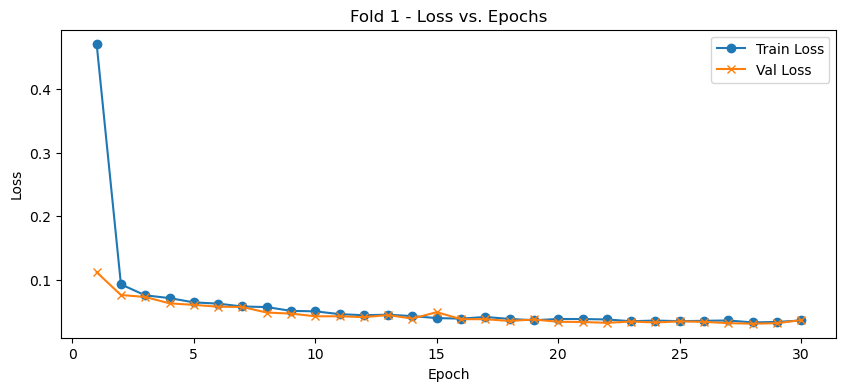

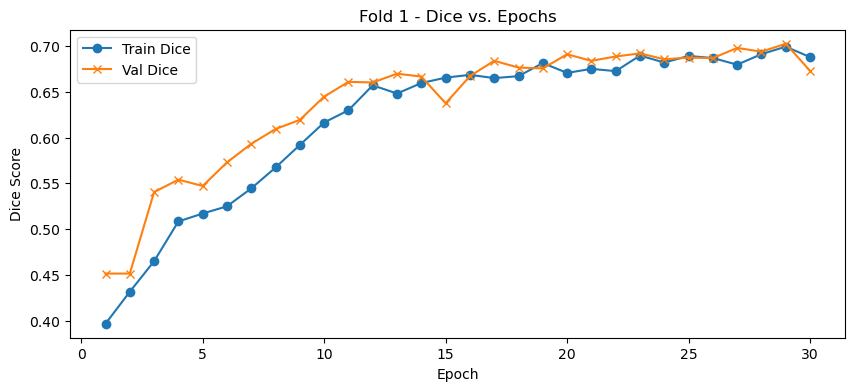

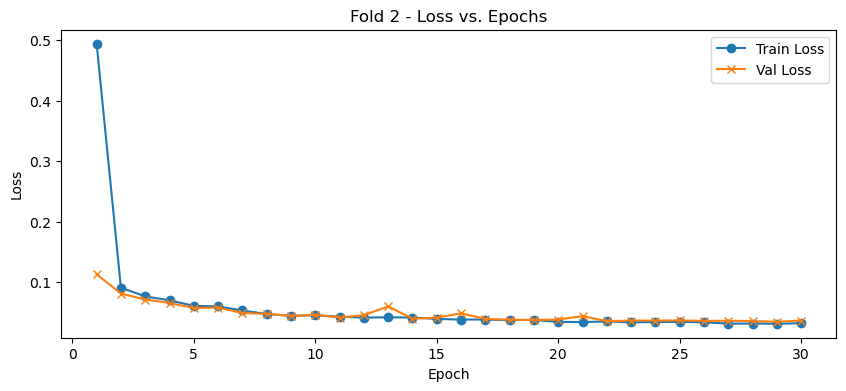

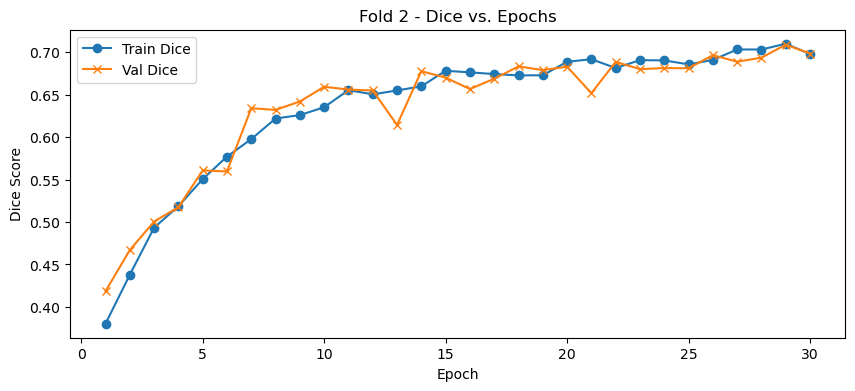

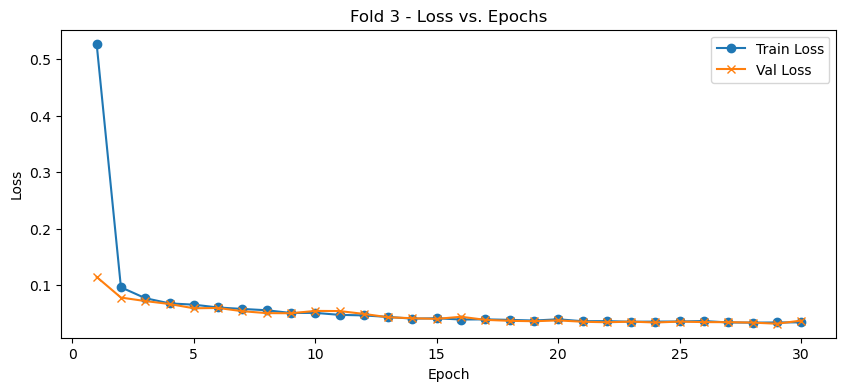

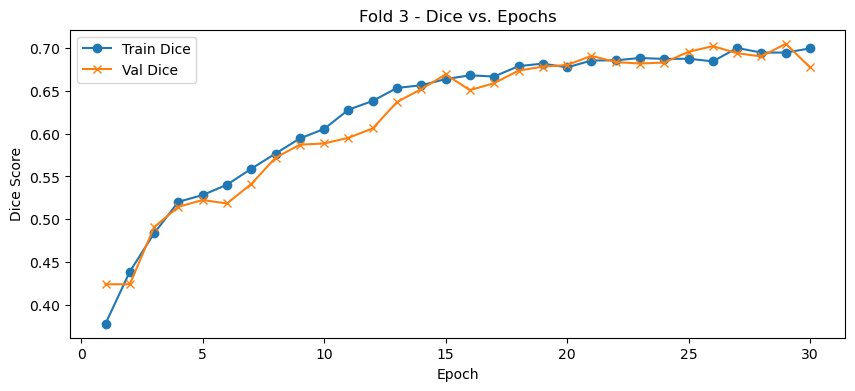

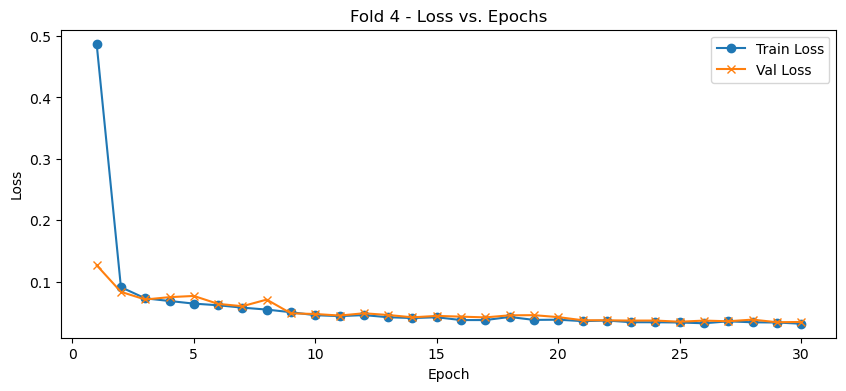

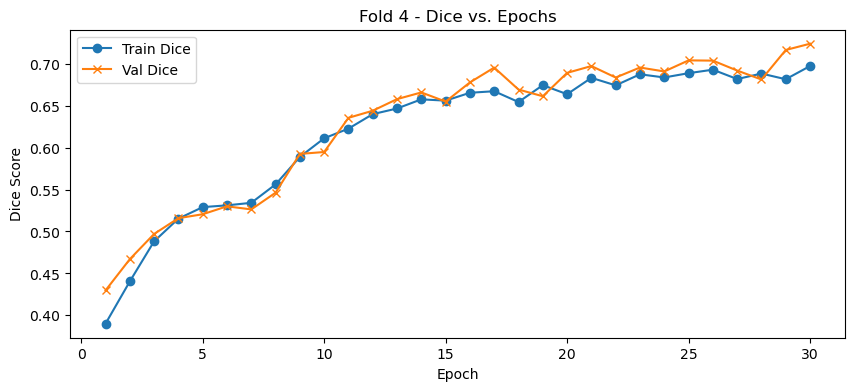

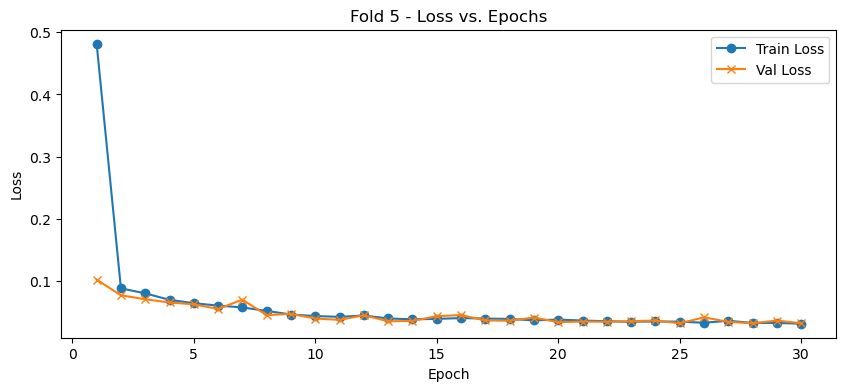

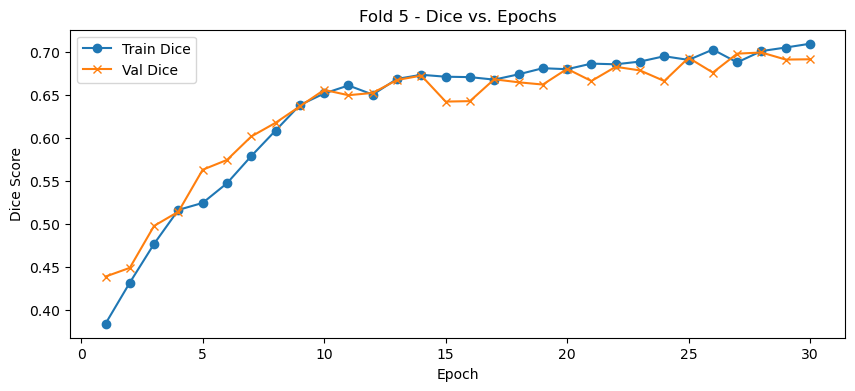

In [32]:
if __name__ == "__main__":
    
    for fold_idx in range(num_splits):
        # Access the arrays for each epoch in this fold
        fold_train_loss = fold_train_loss_history[fold_idx]  # shape (num_epochs,)
        fold_val_loss   = fold_val_loss_history[fold_idx]
        fold_train_dice = fold_train_dice_history[fold_idx]
        fold_val_dice   = fold_val_dice_history[fold_idx]

        epochs_range = range(1, num_epochs + 1)

        # Plot LOSS
        plt.figure(figsize=(10,4))
        plt.title(f"Fold {fold_idx+1} - Loss vs. Epochs")
        plt.plot(epochs_range, fold_train_loss, label="Train Loss", marker='o')
        plt.plot(epochs_range, fold_val_loss, label="Val Loss", marker='x')
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

        # Plot DICE
        plt.figure(figsize=(10,4))
        plt.title(f"Fold {fold_idx+1} - Dice vs. Epochs")
        plt.plot(epochs_range, fold_train_dice, label="Train Dice", marker='o')
        plt.plot(epochs_range, fold_val_dice, label="Val Dice", marker='x')
        plt.xlabel("Epoch")
        plt.ylabel("Dice Score")
        plt.legend()
        plt.show()

**Plot aggregate results across all folds**

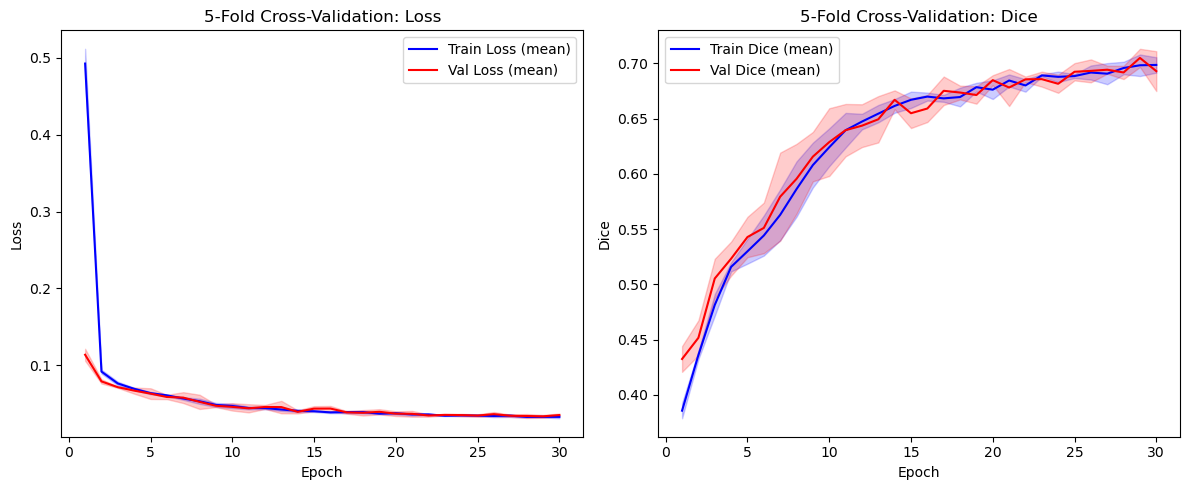

In [33]:
if __name__ == "__main__":
    
    fold_train_loss_history = np.array(fold_train_loss_history)
    fold_val_loss_history   = np.array(fold_val_loss_history)
    fold_train_dice_history = np.array(fold_train_dice_history)
    fold_val_dice_history   = np.array(fold_val_dice_history)
    
    # Compute mean & std across folds at each epoch
    train_loss_mean = fold_train_loss_history.mean(axis=0)
    train_loss_std  = fold_train_loss_history.std(axis=0)

    val_loss_mean = fold_val_loss_history.mean(axis=0)
    val_loss_std  = fold_val_loss_history.std(axis=0)

    train_dice_mean = fold_train_dice_history.mean(axis=0)
    train_dice_std  = fold_train_dice_history.std(axis=0)

    val_dice_mean = fold_val_dice_history.mean(axis=0)
    val_dice_std  = fold_val_dice_history.std(axis=0)

    epochs_range = range(1, num_epochs + 1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    # --- Plot Loss ---
    ax1.plot(epochs_range, train_loss_mean, label='Train Loss (mean)', color='blue')
    ax1.fill_between(
        epochs_range,
        train_loss_mean - train_loss_std,
        train_loss_mean + train_loss_std,
        alpha=0.2, color='blue'
    )

    ax1.plot(epochs_range, val_loss_mean, label='Val Loss (mean)', color='red')
    ax1.fill_between(
        epochs_range,
        val_loss_mean - val_loss_std,
        val_loss_mean + val_loss_std,
        alpha=0.2, color='red'
    )

    ax1.set_title("5-Fold Cross-Validation: Loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Loss")
    ax1.legend()
    
    # --- Plot Dice ---
    ax2.plot(epochs_range, train_dice_mean, label='Train Dice (mean)', color='blue')
    ax2.fill_between(
        epochs_range,
        train_dice_mean - train_dice_std,
        train_dice_mean + train_dice_std,
        alpha=0.2, color='blue'
    )

    ax2.plot(epochs_range, val_dice_mean, label='Val Dice (mean)', color='red')
    ax2.fill_between(
        epochs_range,
        val_dice_mean - val_dice_std,
        val_dice_mean + val_dice_std,
        alpha=0.2, color='red'
    )

    ax2.set_title("5-Fold Cross-Validation: Dice")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Dice")
    ax2.legend()

    plt.tight_layout()
    plt.show()


### 7.5 Results Interpretation

As shown in the plots, the model showed a steady decrease in both training loss and validation loss. And the Dice Coefficient Scores increase over the epoch. This implies our model converged really well and effectively learn from the data.

Additionally, the close alignment between training and validation metrics across epochs suggests that our model's great generalization capability, effectively avoiding the overfitting.

Here's the result for training process (30 epochs):

* Cross-Entropy Loss: 
    * Training Loss: Decrease from ~0.50 to ~0.03.
    * Validation Loss: Decrease from ~0.10 to ~0.03.
    
* Dice Cofficient:
    * Training Dice: Improved from ~0.40 to ~0.70.
    * Validation Dice: Improved from ~0.45 to ~0.68

Possible Improvement:

* As observed from the plot, validation metrics plateau after 20–25 epochs. We can adopt **early stopping** stragegy to save resources.

## 8. Segmentation Visualization

Let's visualize the segmentation to get a intuitive evaluation for the model performance.

For each fold, we:
* Select 5 random images from the fold’s validation split.
* For each selected case, produce a 3-column figure:
    * Column 1: Input image.
    * Column 2: Ground-truth segmentation (label).
    * Column 3: Model’s predicted segmentation with the IoU metric displayed

### 8.1 Evaluation Metric

**Intersection over Union**, also referred as **Jaccard index**, is the area of the intersection over union of the predicted segmentation and the ground truth. It's mathematical definition is:

$$\text{IoU}(A,B) = \frac{\lvert A \cap B\rvert}{\lvert A \cup B\rvert}$$

or:

$$\text{IoU}(A,B) = \frac{\lvert A \cap B\rvert}{\lvert A\rvert + \lvert B\rvert - \lvert A \cap B\rvert}$$

Where $A$ represents the set of predicted positive pixels/voxels, and $B$ represents the set of ground-truth positive pixels/voxels. 

In [34]:
def compute_iou(pred_mask, gt_mask, smooth=1e-6):
    """
    pred_mask: (H, W) int in [0..C-1]
    gt_mask:   (H, W) int in [0..C-1]
    We'll treat everything >0 as "tumor" vs background=0, or do multi-class.
    For simplicity, assume binary for IoU (any >0 is foreground).
    """
    pred_bin = (pred_mask > 0).astype(np.float32)
    gt_bin   = (gt_mask > 0).astype(np.float32)
    
    intersection = (pred_bin * gt_bin).sum()
    union        = pred_bin.sum() + gt_bin.sum() - intersection
    return (intersection + smooth) / (union + smooth)

### 8.2 Define the Evaluation Function

In [35]:
def evaluate_segmentation(model, val_loader, device, max_examples=5):
    """
    Evaluates the trained U-Net model on a few validation samples and
    visualizes the results. This function:
      1) Puts the model in evaluation mode (model.eval()).
      2) Iterates over the validation DataLoader.
      3) Obtains predictions and converts them to class labels (argmax).
      4) Displays the input image, ground truth mask, and model prediction,
         along with an IoU metric in the title.

    Args:
        model (nn.Module): The trained segmentation model.
        val_loader (DataLoader): DataLoader containing validation data.
        device (torch.device): 'mps' or 'cpu' (or 'cuda' if on NVIDIA GPU).
        max_examples (int): How many examples to visualize from the validation set.
    """
    model.eval()
    examples_shown = 0
    
     # Randomly select 'max_examples' indices from the validation dataset.
    indices = random.sample(range(len(val_dataset)), max_examples)

    with torch.no_grad():
        for idx in indices:
            # Get the image and mask from the dataset.
            image, mask = val_dataset[idx]  
            # image is assumed to have shape (C, H, W) (e.g., a 4-channel MRI) and mask is (1, H, W) or (H, W).
            
            # Prepare the image for inference by adding a batch dimension.
            image_input = image.unsqueeze(0).to(device)  # (1, C, H, W)
            output = model(image_input)  # Output shape: (1, num_classes, H, W)
            pred = torch.argmax(output, dim=1).squeeze(0)  # Predicted mask: (H, W)
            
            # Convert tensors to NumPy arrays for visualization.
            mask_np = mask.squeeze().cpu().numpy()
            pred_np = pred.cpu().numpy()
            
            # For multi-channel images, select a specific channel for display.
            # For example, if the image has 4 channels, you can choose the 4th channel (index 3) to display.
            if image.dim() == 3:  # (C, H, W)
                if image.shape[0] >= 4:
                    img_for_show = image[3].cpu().numpy()  # Change the index if needed.
                else:
                    img_for_show = image[0].cpu().numpy()
            else:
                img_for_show = image.squeeze().cpu().numpy()
            
            # Compute IoU between prediction and ground truth.
            iou_val = compute_iou(pred_np, mask_np)
            
            # Create a figure with 1 row and 3 columns.
            fig, axs = plt.subplots(1, 3, figsize=(15, 5))
            
            # Display the input image.
            axs[0].imshow(img_for_show, cmap='gray')
            axs[0].set_title('Input Image')
            axs[0].axis('off')
            
            # Display the ground truth mask.
            axs[1].imshow(mask_np, cmap='gray')
            axs[1].set_title('Ground Truth')
            axs[1].axis('off')
            
            # Display the predicted mask and put the IoU value in the title.
            axs[2].imshow(pred_np, cmap='gray')
            axs[2].set_title(f'Predicted Mask\nIoU = {iou_val:.3f}')
            axs[2].axis('off')
            
            plt.tight_layout()
            plt.show()

### 8.3 Start Evluation


Evaluation for Fold 1 / 5


/var/folders/w5/yltygk2j75lbqw4cbwg691sr0000gn/T/ipykernel_58138/2318290071.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path, map

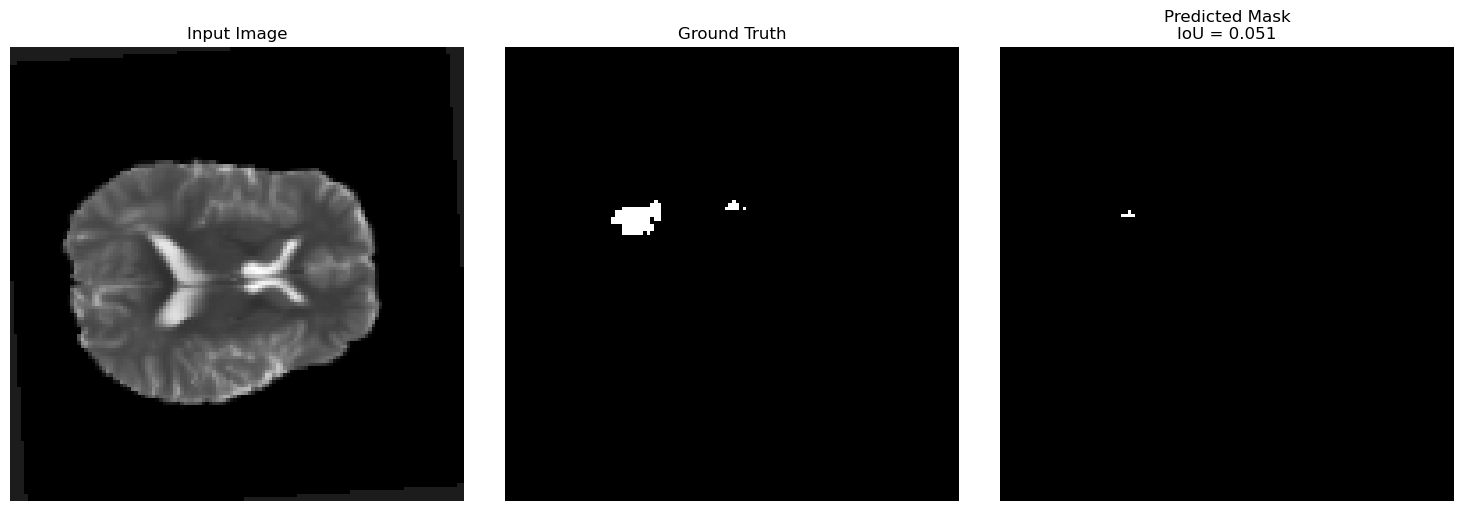

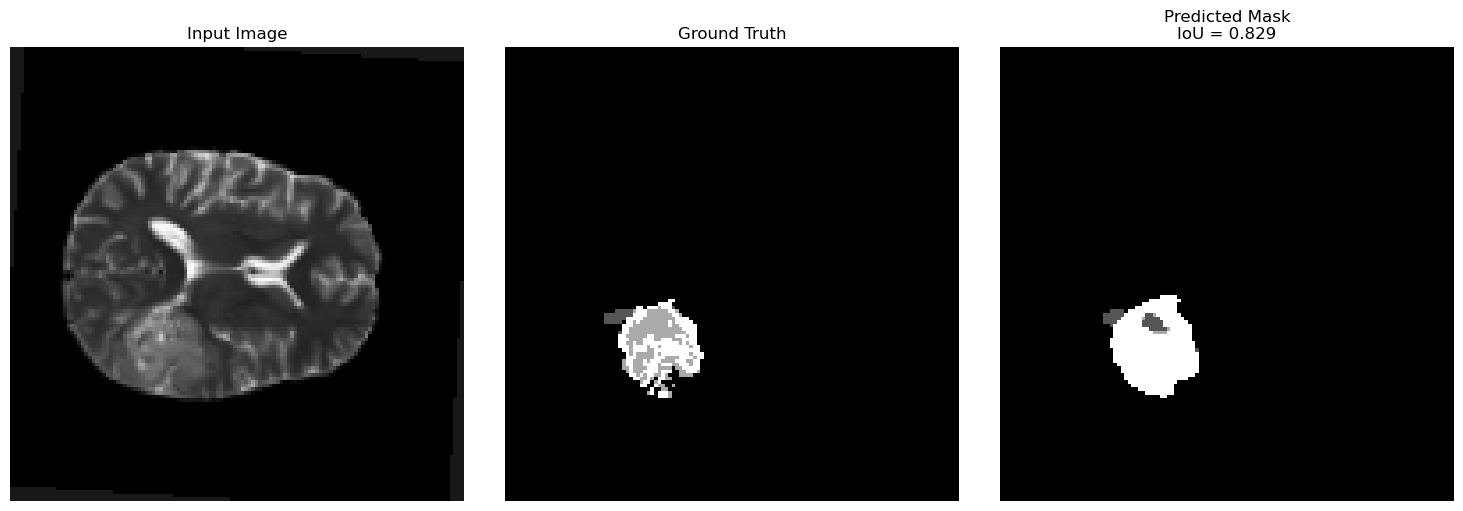

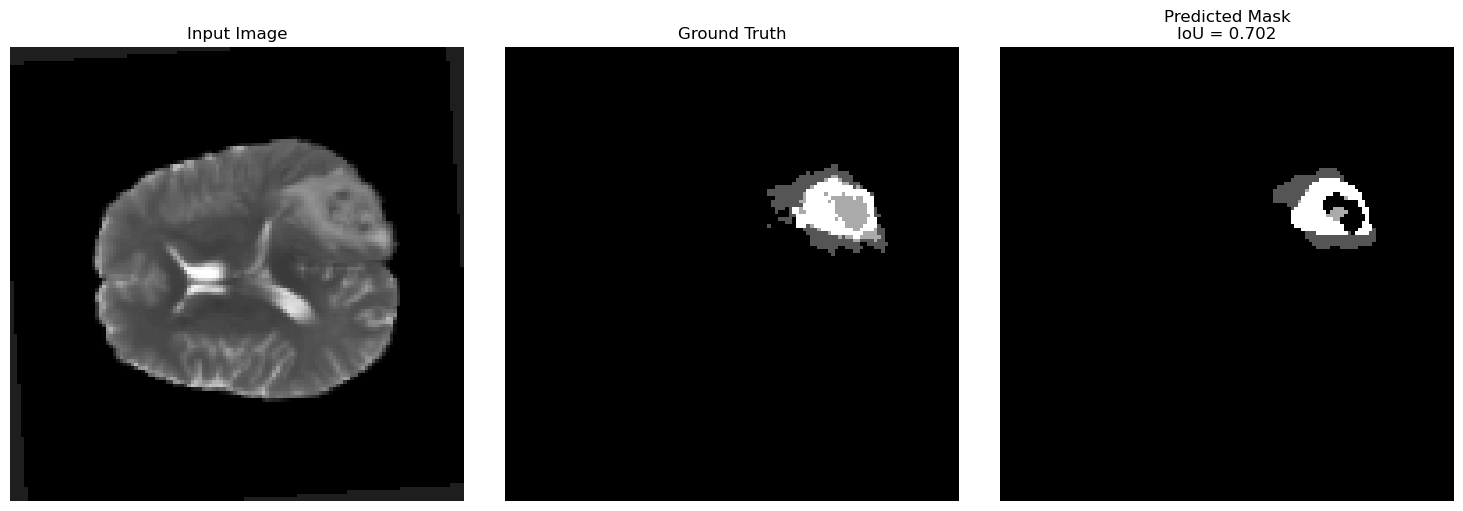

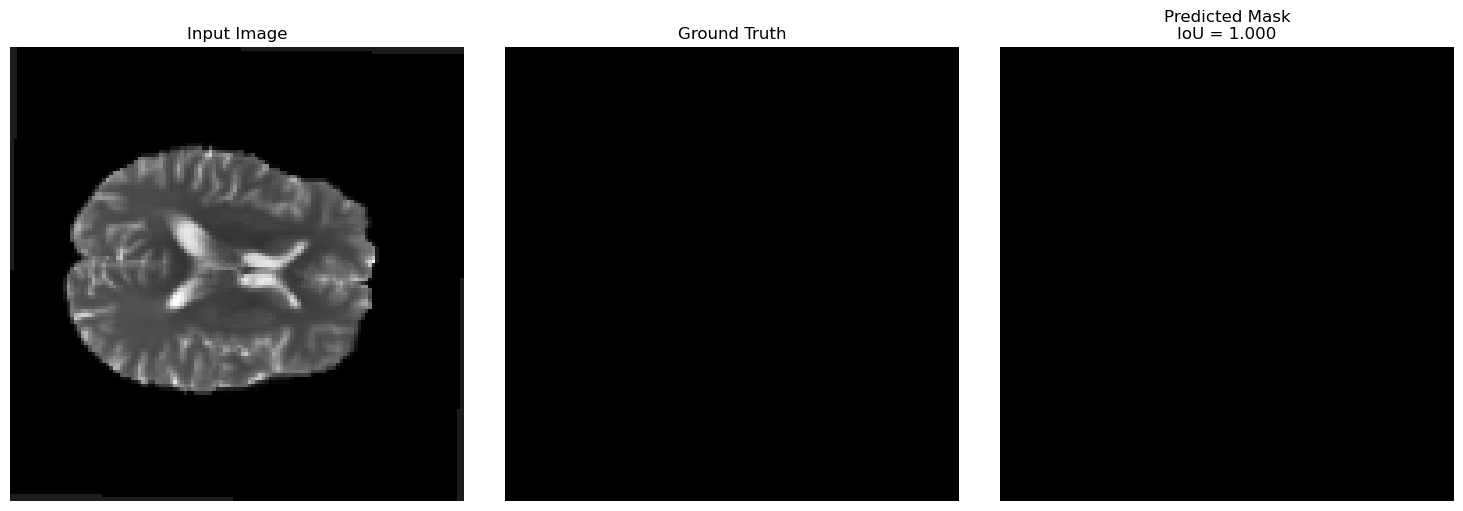

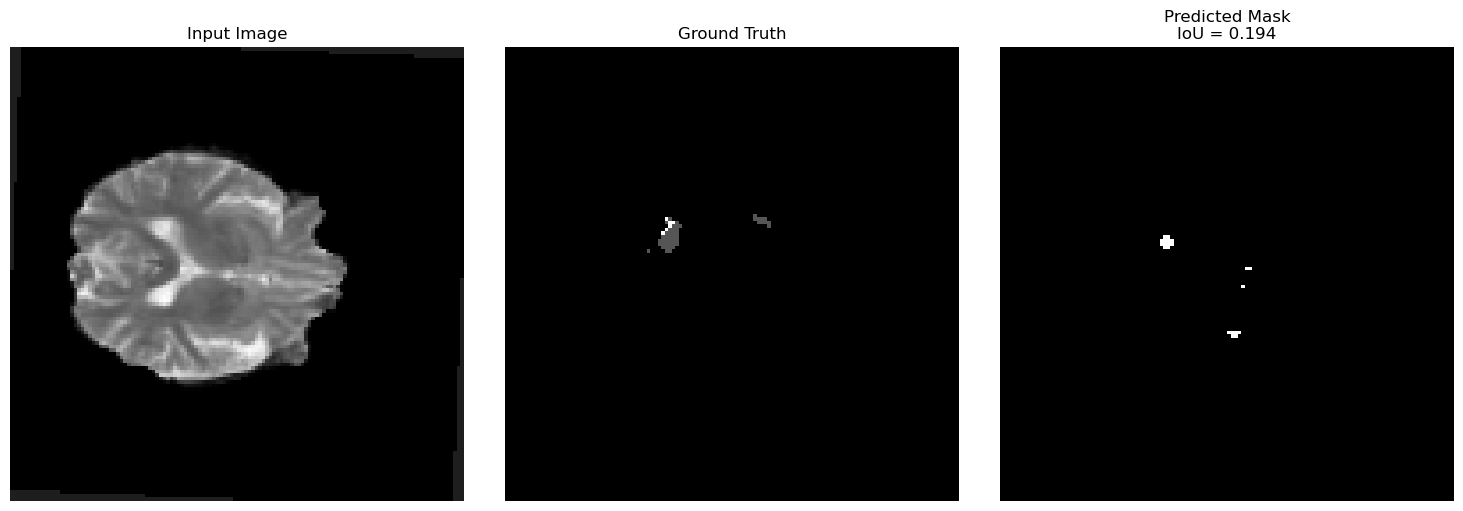


Evaluation for Fold 2 / 5


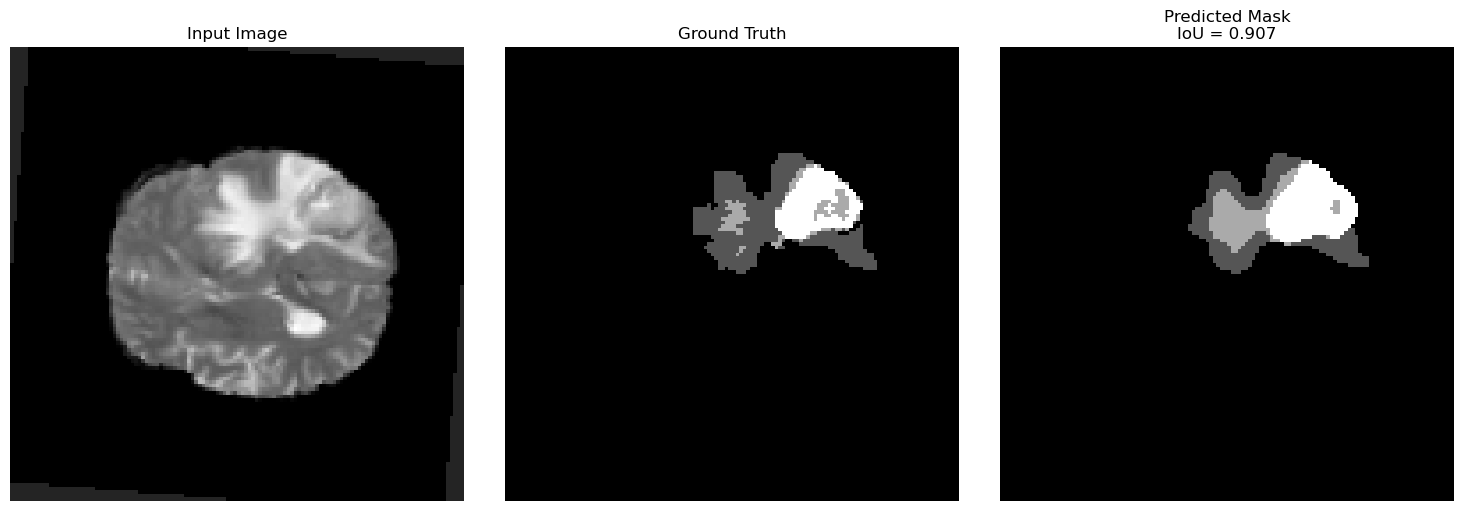

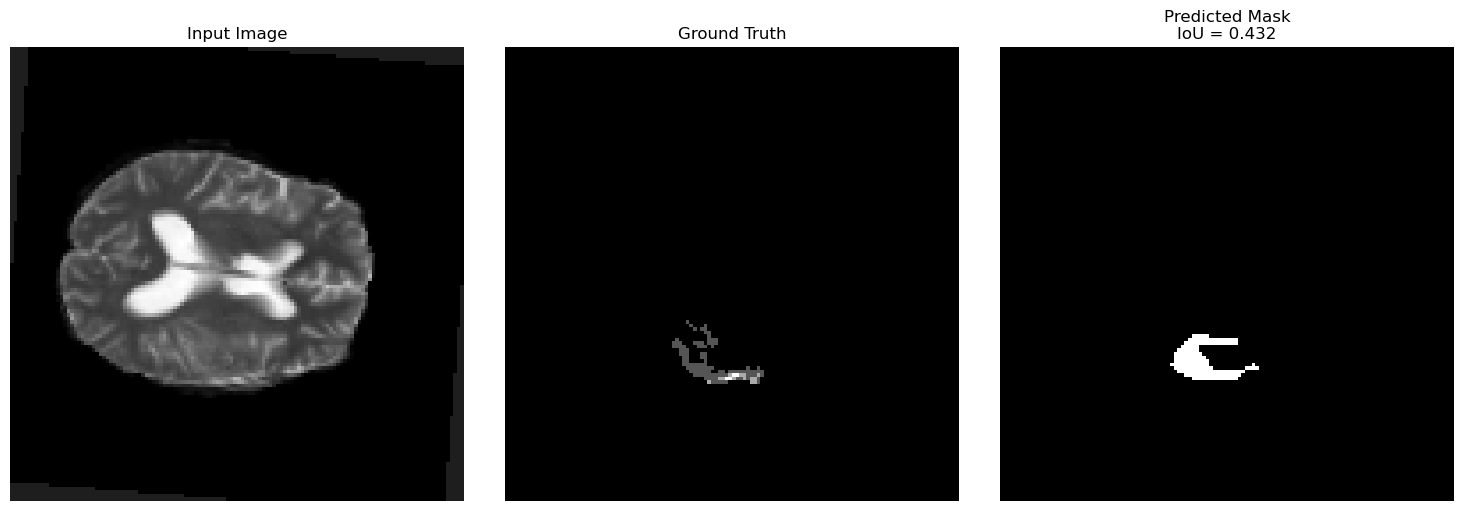

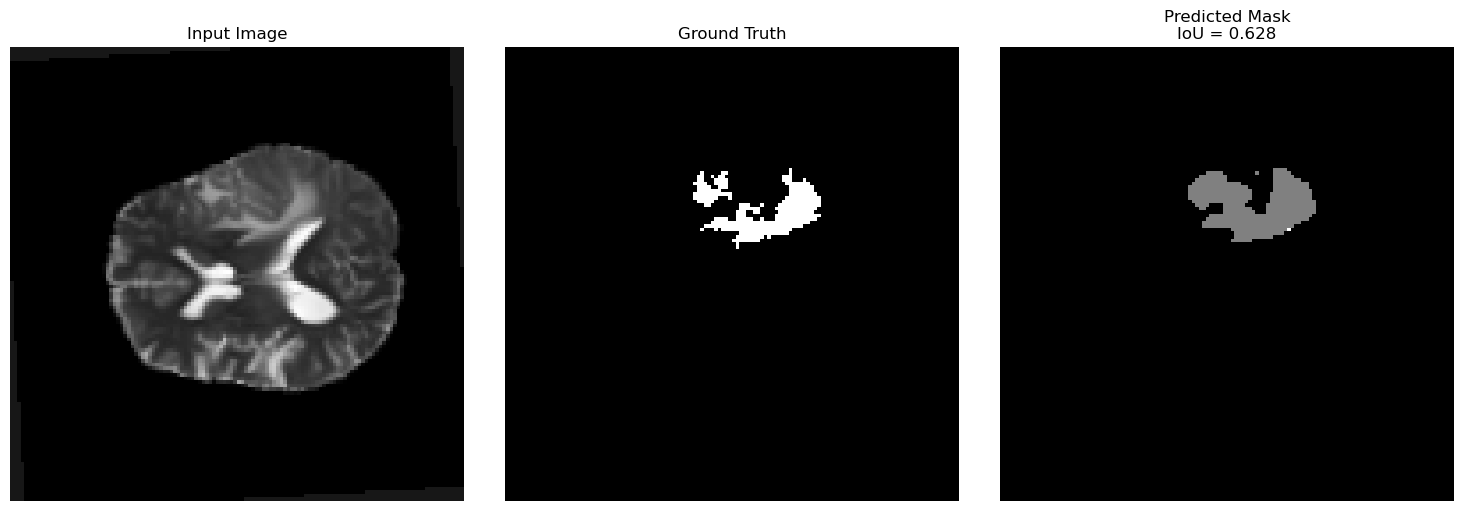

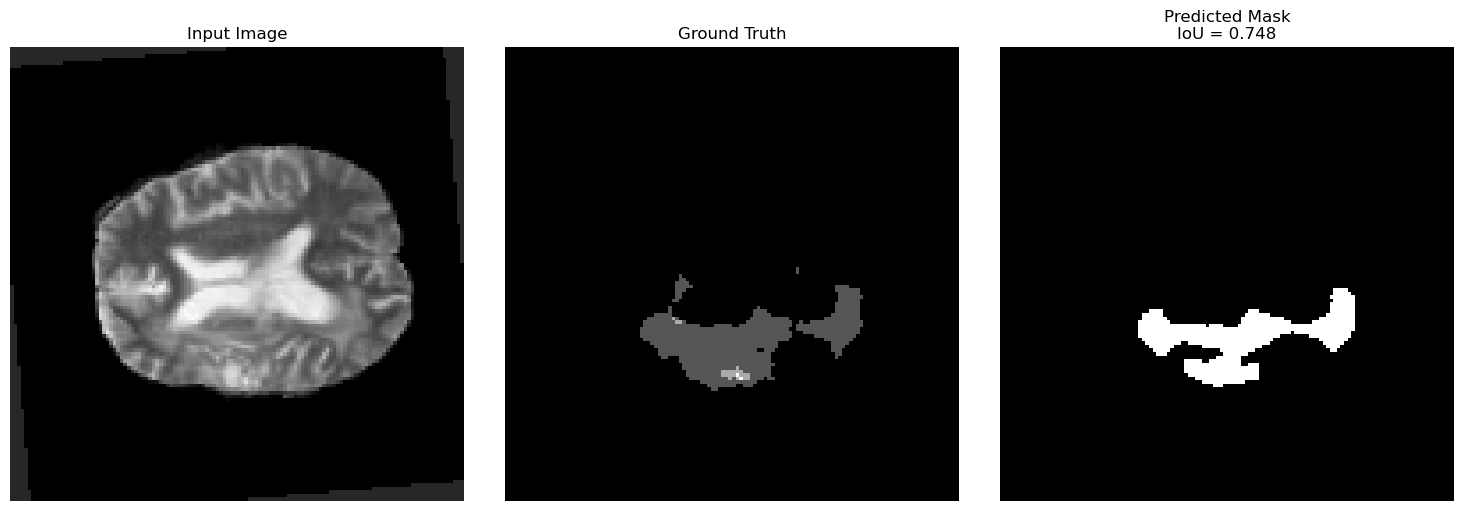

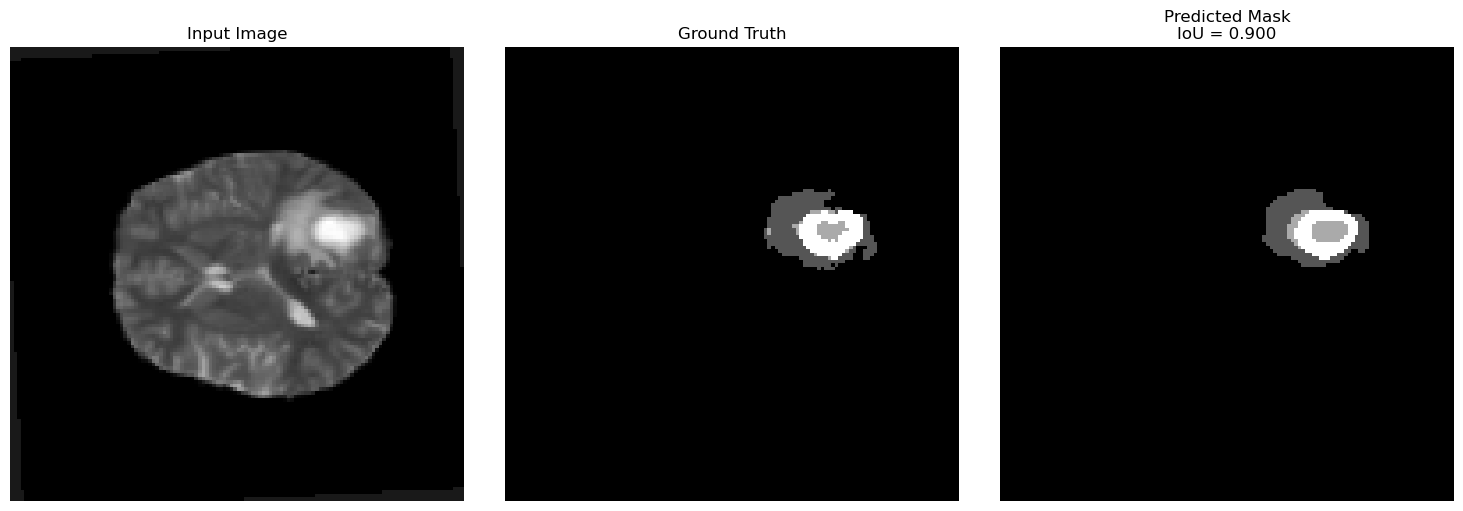


Evaluation for Fold 3 / 5


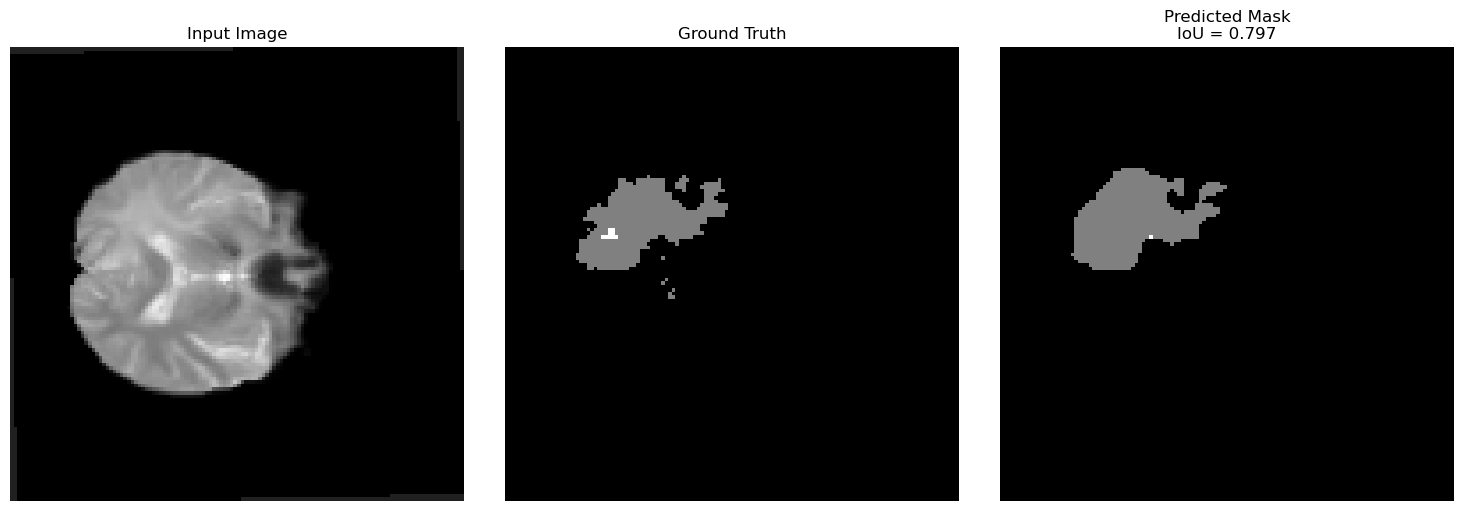

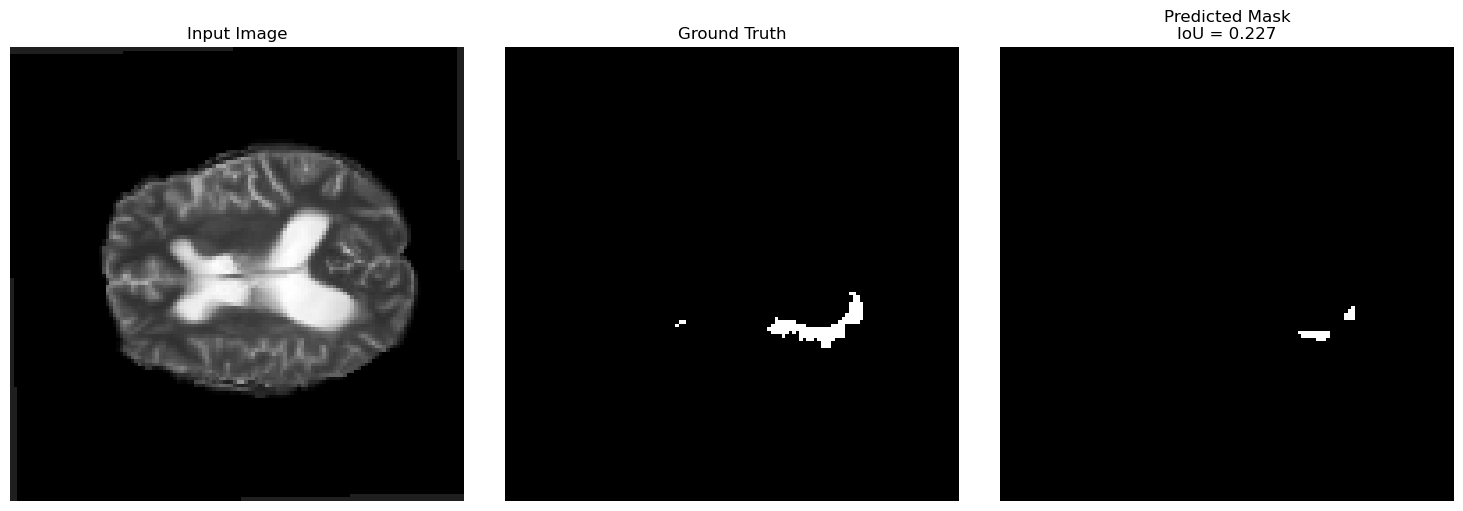

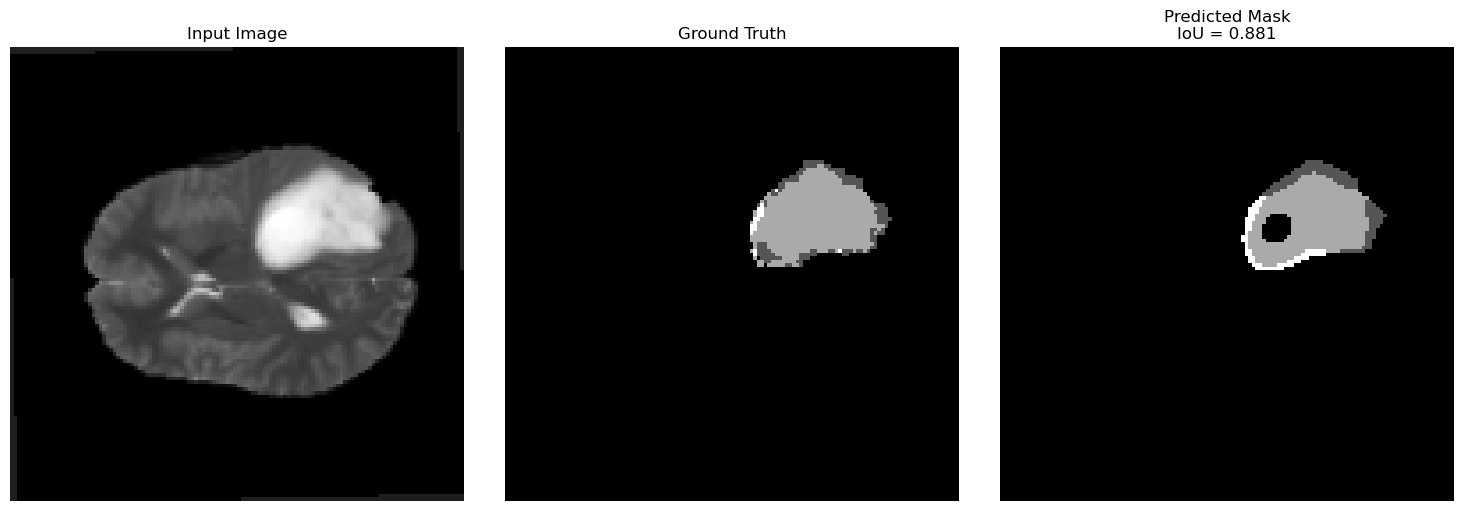

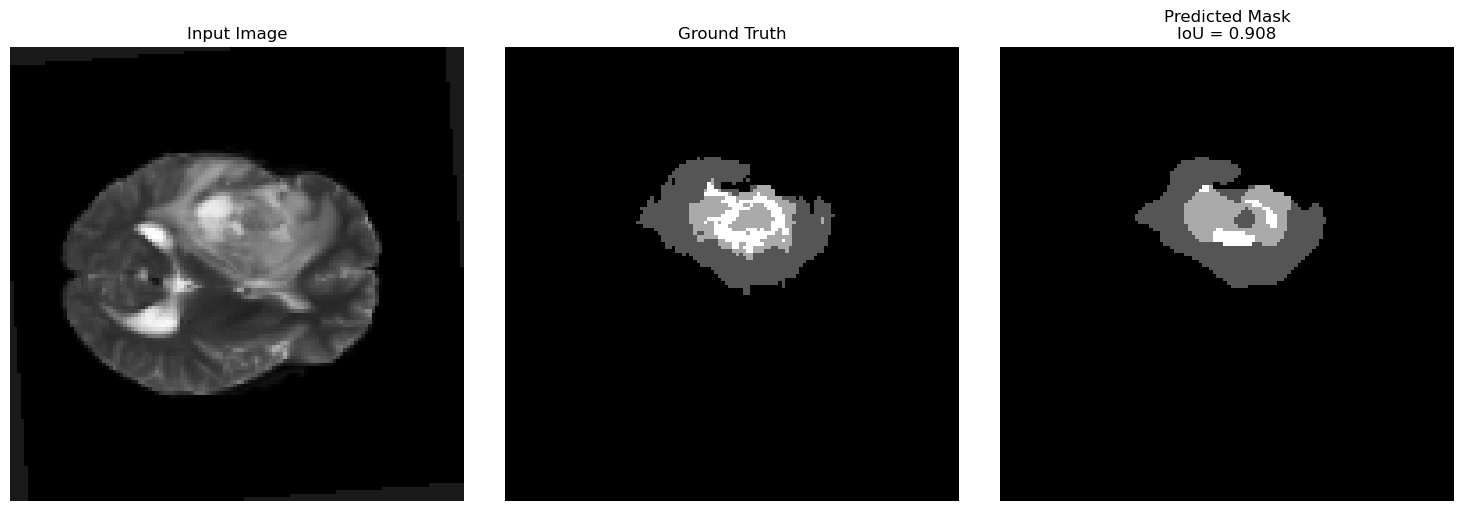

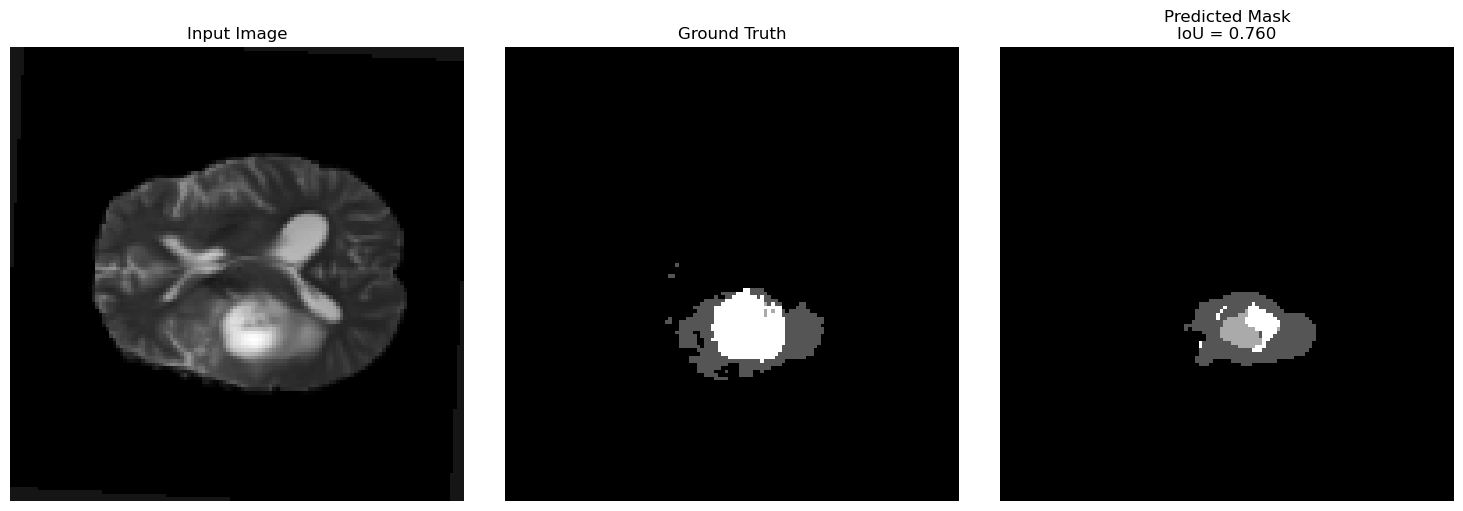


Evaluation for Fold 4 / 5


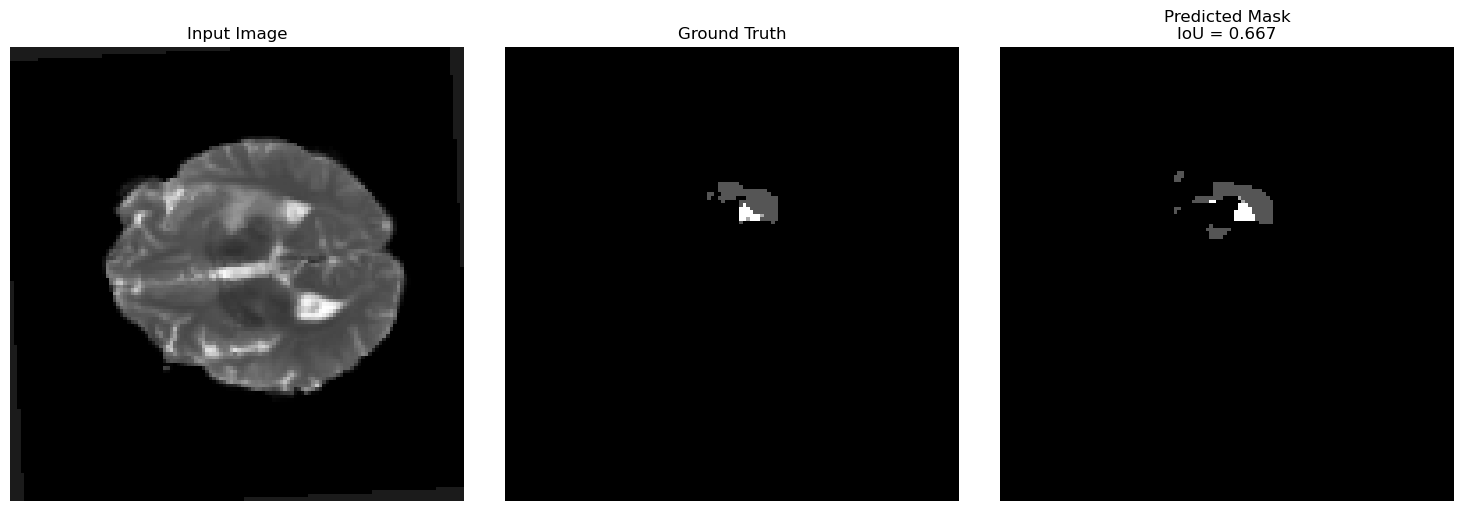

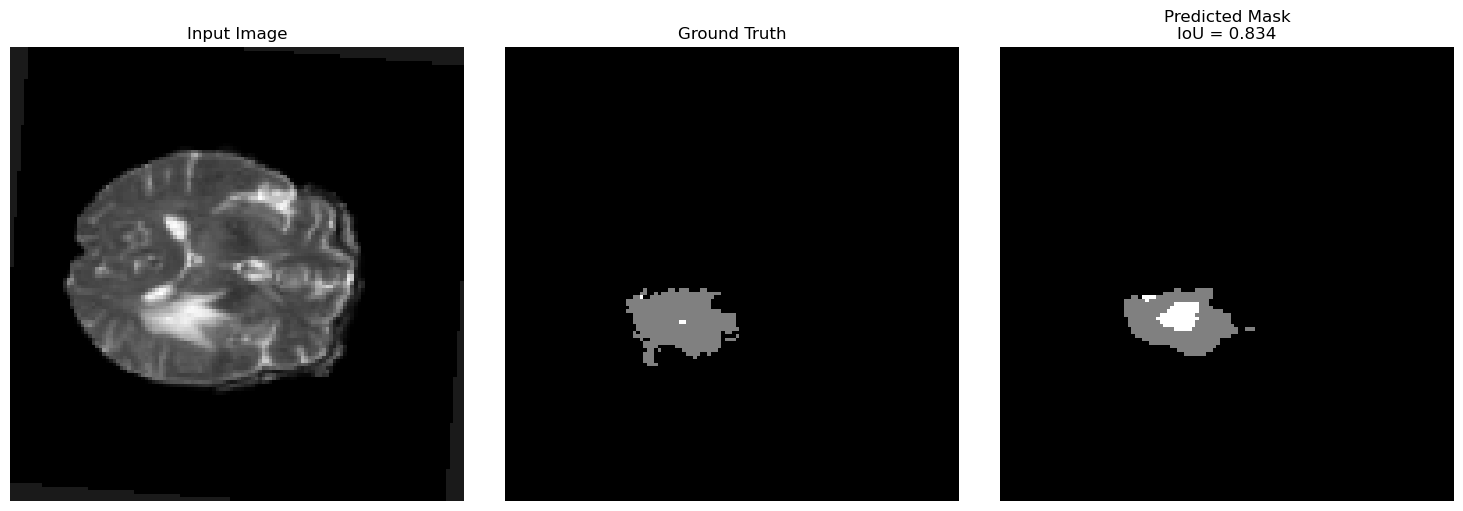

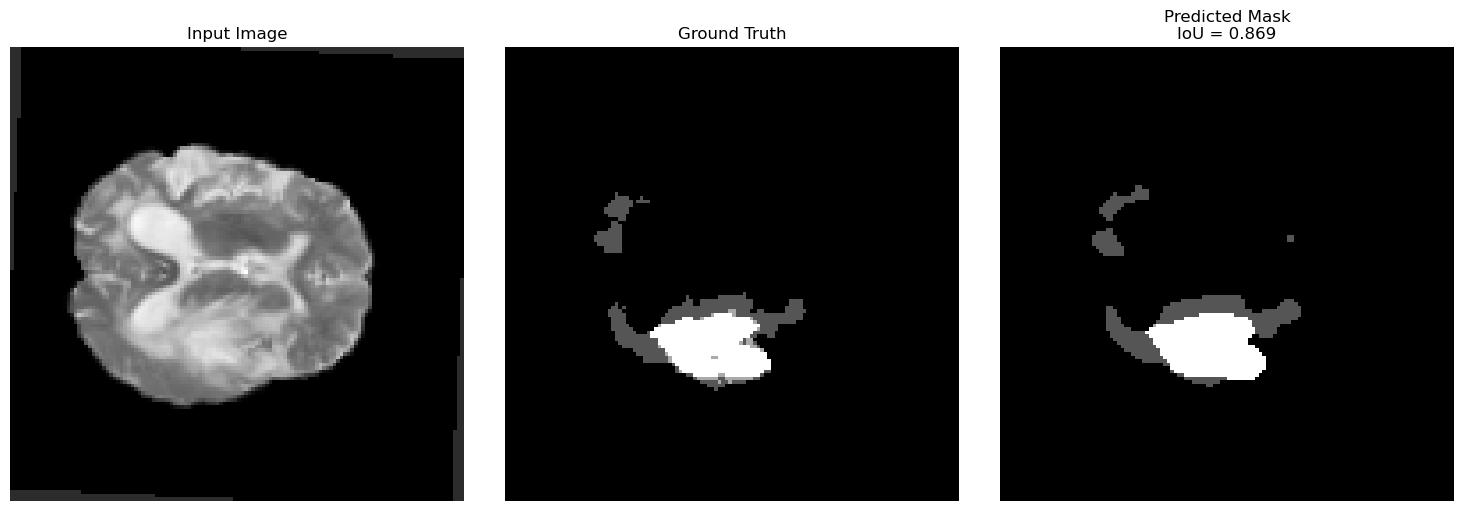

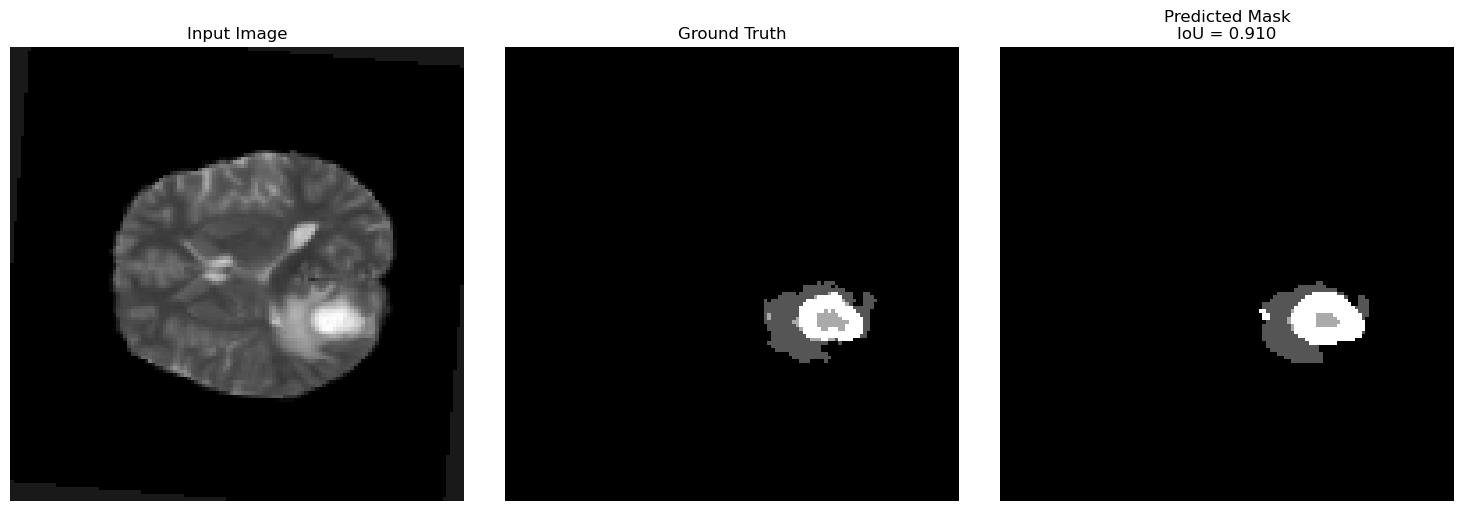

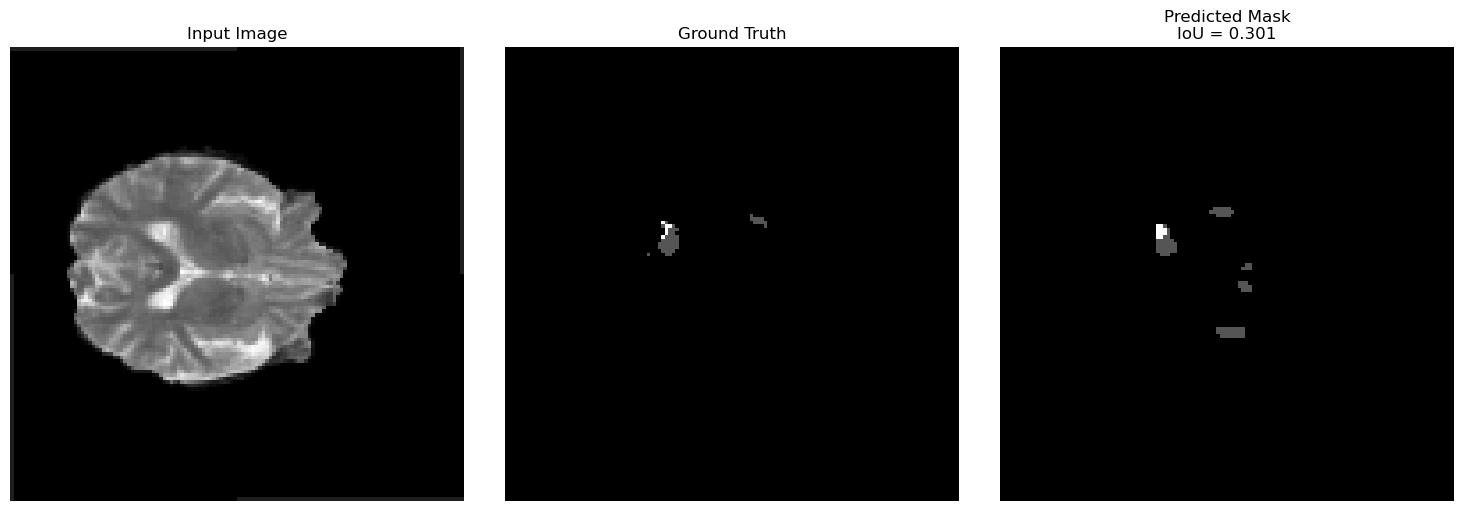


Evaluation for Fold 5 / 5


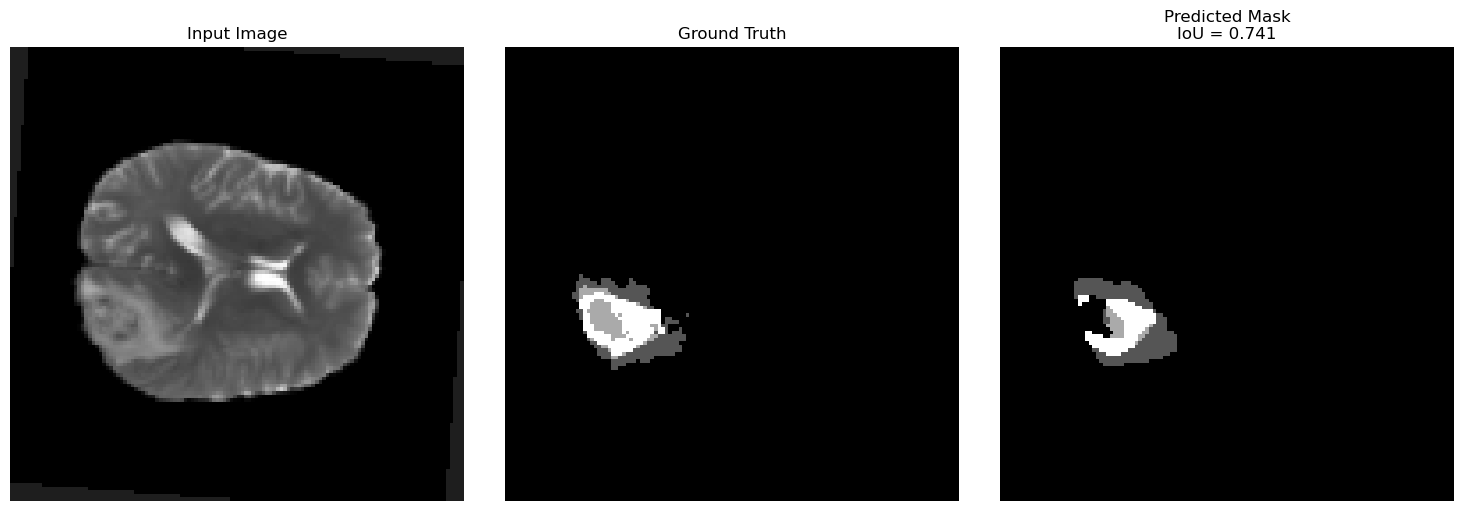

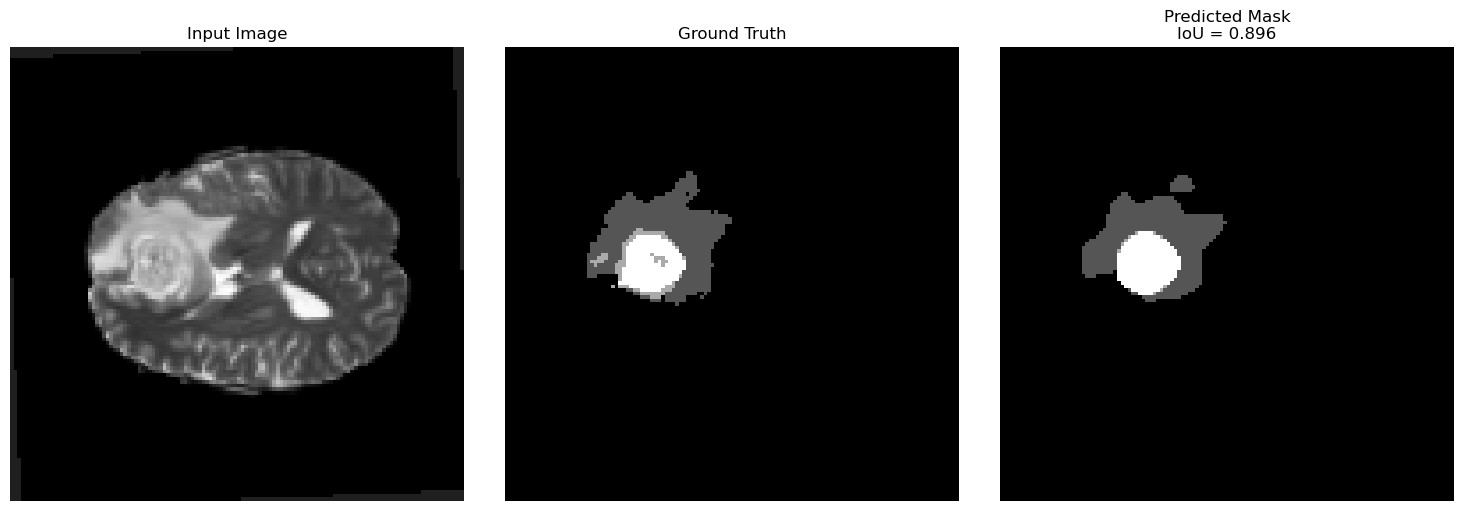

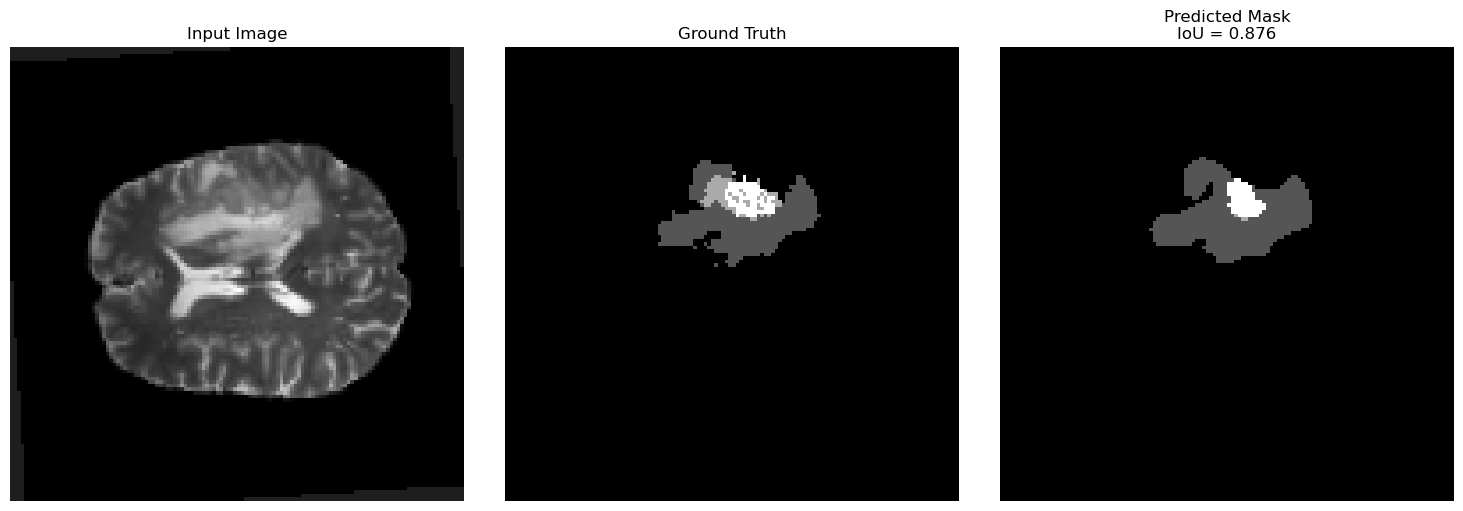

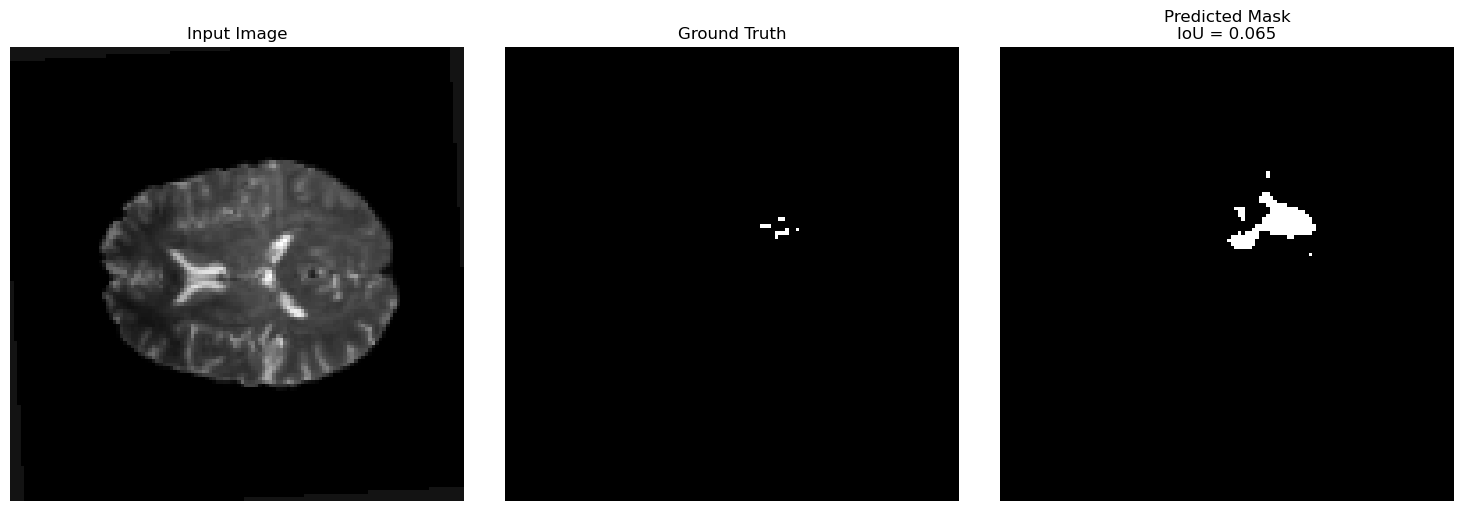

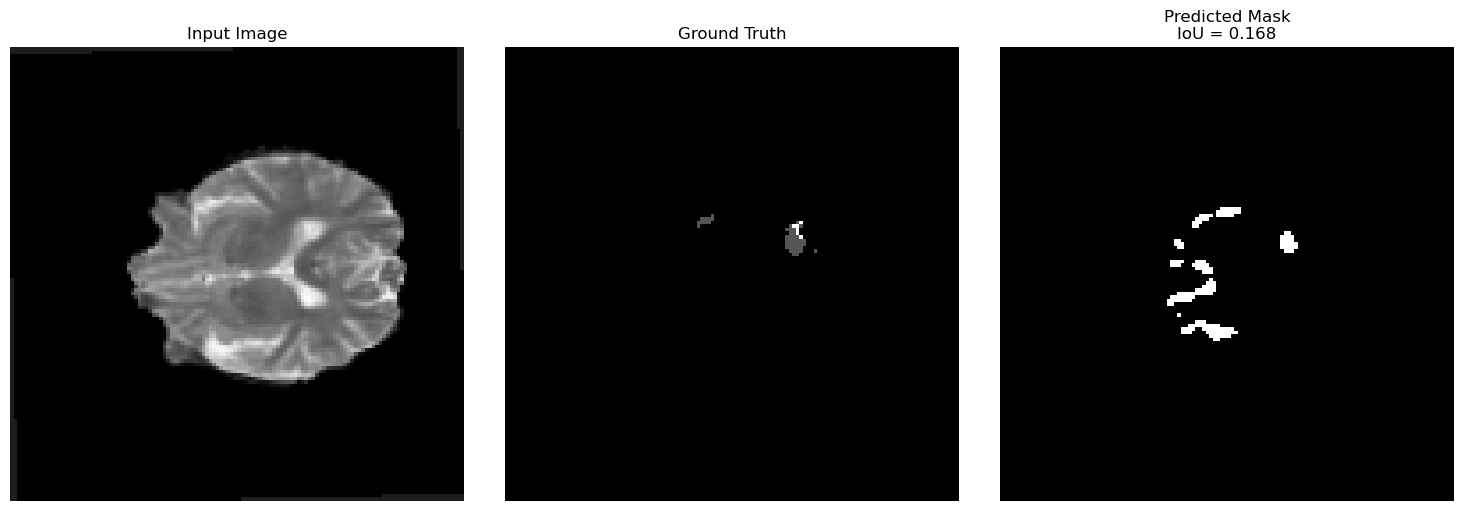

In [36]:
model = UNet(in_channels=4, out_channels=4, base_filters=64).to(device)

for fold_idx in range(num_splits):
    print("\n"+"="*40)
    print(f"Evaluation for Fold {fold_idx+1} / {num_splits}")
    print("="*40)
    
    checkpoint_path = f"checkpoints_brain_tumor/fold_{fold_idx + 1}/unet_epoch30.pth"
    
    state_dict = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(state_dict)
    
    model.eval()
    
    evaluate_segmentation(model,val_datasets[fold_idx], device, max_examples=5)

### 8.3 Results Interpretation

* Evaluation Results with IoU:
    * Fold 1: 0.051, 0.829, 0.702, 1.000, 0.194
    * Fold 2: 0.907, 0.432, 0.627, 0.748, 0.900
    * Fold 3: 0.797, 0.227, 0.881, 0.908, 0.760
    * Fold 4: 0.667, 0.834, 0.869, 0.910, 0.301
    * Fold 5: 0.741, 0.896, 0.876, 0.065, 0.168
    
* Interpretation:
    
    Generally, the model has a great performance for the brain tumor segmentation task, espeically when the tumor is large. However, if the tumor is not big enough, the model gets a low IoU score, usually less than 0.2. This indicates that our model may not be capable of detect early-stage brain tumors. We should further research into how to improve model performance on samples with small areas of tumors.